## 병원 데이터 기준으로 정리
#### '국가건강검진 판정기준 및 판정소견 표준화 연구' 연구보고서 확인

<혈색소>
성인 남자 : 13g/dl 이하 빈혈 진단
성인 여자 : 12g/dl 이하 빈혈 진단

<공복 혈당>
정상치 :  70~99 ㎎/ℓ 
당뇨병 진단 : 126 mg/dL 이상

<콜레스테롤>
(1) HDL 콜레스테롤
- 성인 남자 : 40 mg/dL 이상 유지 정상
- 성인 여자 : 50 mg/dL 이상 유지 정상
=> 60 mg/dL 이상이면 심혈관보호효과
(2)LDL 콜레스테롤 : 130㎎/dL 미만 정상
 협심증, 당뇨병, 심근경색증, 말초혈관질환 등 있을 경우 => 100 mg/dL 미만(70mg/dL 미만이면 더 효과적)이 되도록 유지

<AST, ALT>
- AST : ~ 40 IU/L 정상
- ALT : ~ 40IU/L 정상

## Data Preprocessing

### Load Libraries
[원문](https://github.com/KimGyuLee/Health-Care-Big-Data-Project/blob/master/Healthcare%20Data%20Preprocessing.ipynb)

- https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/health_analysis-output.ipynb#scrollTo=l55AijjJj0JL

- https://github.com/KimGyuLee/Health-Care-Big-Data-Project/blob/master/Healthcare%20Data%20Preprocessing.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 글꼴 설정

In [ ]:
# 한글 폰트 '나눔바른고딕' 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## Data

In [ ]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df2 = pd.read_csv('/content/drive/MyDrive/health/health_data.csv', encoding='cp949')
df2.shape

(1000000, 31)

In [ ]:
df = df2.copy()

In [ ]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [ ]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [ ]:
df.describe()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,2020.0,500000.500000,34.047725,1.489311,11.917757,160.964085,63.060790,82.357094,0.933045,0.935036,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,0.0,288675.278933,12.443883,0.499886,2.171036,9.197899,12.269907,9.622632,0.637453,0.644911,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,2020.0,1.000000,11.000000,1.000000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,2020.0,250000.750000,27.000000,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,2020.0,500000.500000,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,2020.0,750000.250000,44.000000,2.000000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,2020.0,1000000.000000,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


In [ ]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [ ]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

#### 결측치 확인

In [ ]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

In [ ]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다.
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

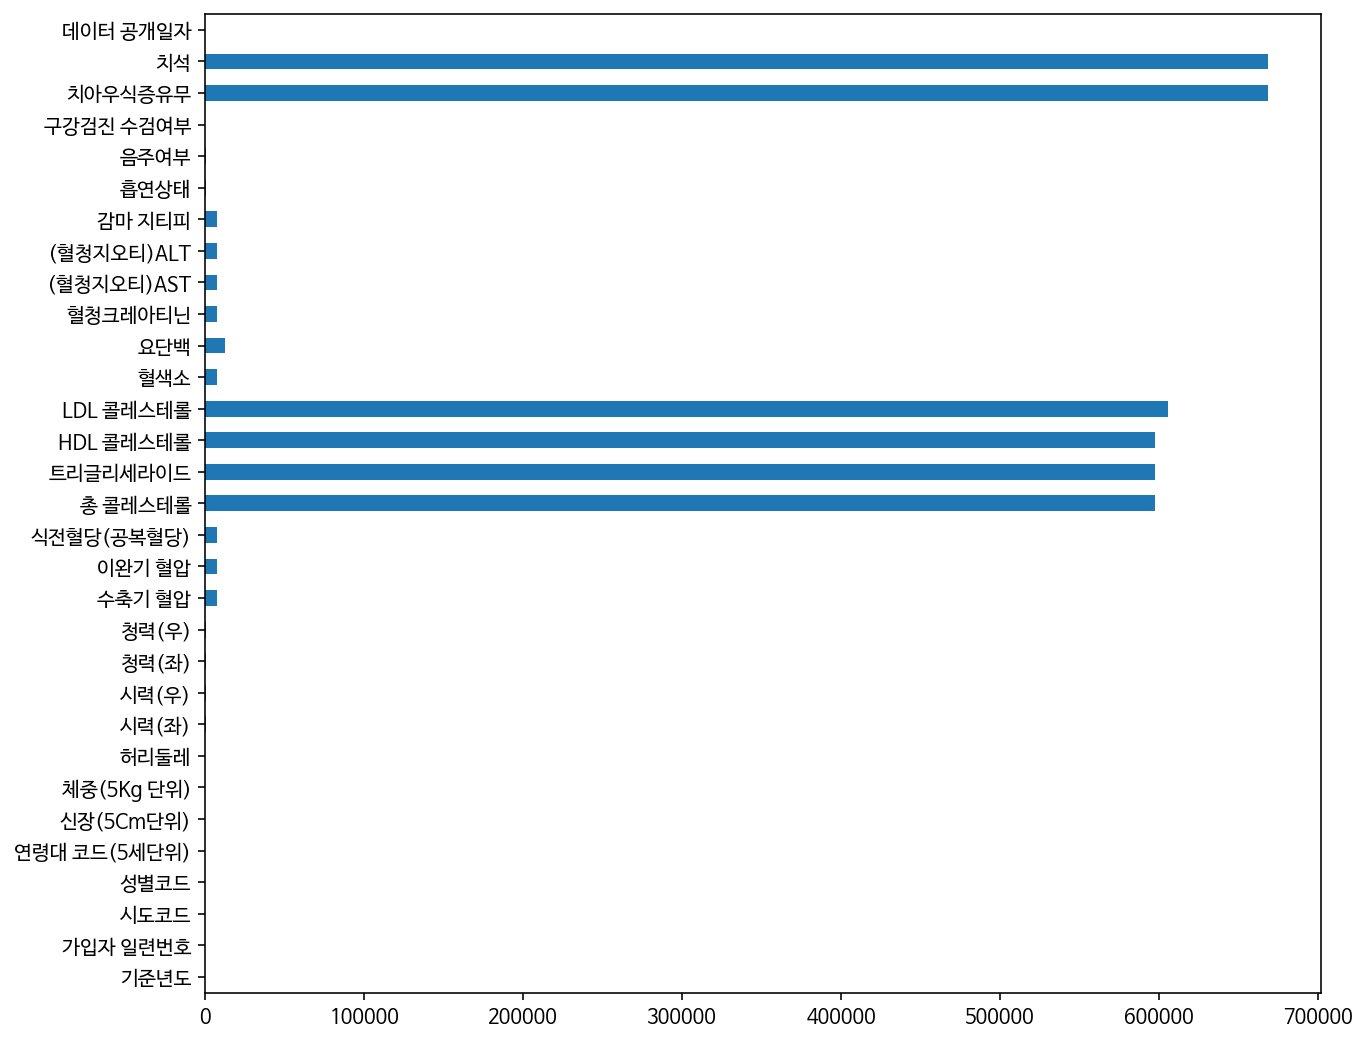

In [ ]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize=(10, 9))

### Data Preprocessing
#### 분석에 사용할 수 없는 변수 제거

In [ ]:
# df.drop('기준년도', axis=1, inplace=True) # 값이 2020년 밖에 없다
# df.drop('가입자 일련번호', axis=1, inplace=True) # 필요할까요?
# df.drop('시도코드', axis=1, inplace=True) # 필요할까요?
# df.drop('연령대 코드(5세단위)', axis=1, inplace=True) # 필요(나이)
# df.drop('시력(좌)', axis=1, inplace=True) # 필요할까요?
# df.drop('시력(우)', axis=1, inplace=True) # 필요할까요?
# df.drop('청력(좌)', axis=1, inplace=True) # 필요할까요?
# df.drop('청력(우)', axis=1, inplace=True) # 필요할까요?
# df.drop('수축기 혈압', axis=1, inplace=True) # 필요
# df.drop('이완기 혈압', axis=1, inplace=True) # 필요
# df.drop('흡연상태', axis=1, inplace=True) # 필요할까요?
# df.drop('음주여부', axis=1, inplace=True) # 필요할까요?
# df.drop('구강검진 수검여부', axis=1, inplace=True) # 필요할까요?
# df.drop('치아우식증유무', axis=1, inplace=True) # 필요할까요?
# df.drop('치석', axis=1, inplace=True) # 결측치가 너무 많고 이해하기 어려운 값이 있다. - 필요없음
# df.drop('데이터 공개일자', axis=1, inplace=True) # 필요없음
df.drop(['기준년도','가입자 일련번호','시도코드','시력(좌)','시력(우)','청력(좌)','청력(우)','흡연상태','음주여부','구강검진 수검여부','치아우식증유무','치석','데이터 공개일자'], axis=1, inplace=True)
df.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
0,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0
1,2,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0
2,2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0
3,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0
4,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0




---



#### 이상치 제거

In [ ]:
df.loc[df['허리둘레'] > 900, '허리둘레'] = np.nan # 허리둘레 900이상인 값 결측치로 변경
# df.loc[df['시력(좌)'] == 9.9, '시력(좌)'] = 0; df.loc[df['시력(우)'] == 9.9, '시력(우)'] = 0 # 시력이 0인 사람을 실명으로 간주
df = df[df['LDL 콜레스테롤'] <= df['총 콜레스테롤']] # 총콜레스테롤 보다 LDL이 높은 경우 제거
df.loc[df['트리글리세라이드'] > 1500, '트리글리세라이드'] = np.nan # 결측치로 변경
df.loc[df['LDL 콜레스테롤'] > 300, 'LDL콜레스테롤'] = np.nan # 결측치로 변경
df.loc[df['HDL 콜레스테롤'] > 300, 'HDL 콜레스테롤'] = np.nan # 결측치로 변경
df.loc[df['총 콜레스테롤'] > 500, '총 콜레스테롤'] = np.nan # 결측치로 변경

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)


#### 결측치 제거

In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.columns

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피'],
      dtype='object')

#### 범주형 변수로 데이터 타입 수정

In [ ]:
# 1,2로 되어있는 성별코드 0,1 로 변경 후 성별로 이름 변경 
df['성별코드'] = np.where(df['성별코드'] == 1, 0, 1)
df['성별'] = df['성별코드'].astype('object')
df.drop(['성별코드'], axis=1, inplace=True)

# 컬럼명 '연령대코드(5세단위)', '연령대'로 변경 
df['연령대'] = df['연령대 코드(5세단위)'].astype('object')
df.drop('연령대 코드(5세단위)', axis=1, inplace=True)

# # 시도 코드
# df['시도코드'] = df['시도코드'].astype('object')

# # 청력
# df['청력(좌)'] = df['청력(좌)'].astype('int')
# df['청력(좌)'] = df['청력(좌)'].astype('object')
# df['청력(우)'] = df['청력(우)'].astype('int')
# df['청력(우)'] = df['청력(우)'].astype('object')

# 요단백
df['요단백'] = df['요단백'].astype('int')
df['요단백'] = df['요단백'].astype('object')

# # 흡연상태
# df['흡연상태'] = df['흡연상태'].astype('int')
# df['흡연상태'] = df['흡연상태'].astype('object')

# # 컬럼명 '구강검진 수검여부', '구강검진_수검'으로 변경
# df['구강검진_수검'] = df['구강검진 수검여부'].astype('object')
# df.drop('구강검진 수검여부', axis=1, inplace=True)

# 컬럼명 '신장(5Cm단위)', '신장'으로 변경
df['신장'] = df['신장(5Cm단위)'].astype('object')
df.drop(['신장(5Cm단위)'], axis=1, inplace=True)

# 컬러명 '체중(5Kg단위)', '체중'으로 변경
df['체중'] = df['체중(5Kg 단위)'].astype('object')
df.drop('체중(5Kg 단위)', axis=1, inplace=True)

In [ ]:
obj_cols = df.select_dtypes('object').columns   # object 변수
obj_cols

Index(['성별', '연령대', '신장', '체중'], dtype='object')

#### 1. 파생변수 (기초질환)
- 실명 (X)
- 복부비만
- 고지혈증
- 고혈압, 고혈압_k
- 총콜레스테롤_div
- 공복혈당
- 당뇨, 당뇨_k
- 당뇨_표적장기손상
- 빈혈, 빈혈_k
- whtr, whtr_k (허리둘레/키) (X)
- 도시 (X)
- bmi, bmi_div, bmi_div_k, BMI (X)
- 심혈관질환 관련 콜레스테롤 지수 (non-HDL, CRF, 대사증후군)
- 혈청크레아티닌_진단
- 나이 (X)
- eGFR, GFR, eGFR_진단
- 신장질환
- 심혈관질환
- 단백뇨, 단백뇨_k
- AST구분, ALT구분, 감마지티피구분, AST/ALT비율, GTP/ALT비율, 알코올성간질환여부
- 기초대사량 (X)

**복부비만**

In [ ]:
df['복부비만'] = np.where(((df['허리둘레'] >= 90) & (df['성별']==0)) | ((df['허리둘레'] >= 85) & (df['성별']==1)) == True, 1, 0).astype('object')

**고지혈증**

In [ ]:
df['고지혈증']=np.where((df['총 콜레스테롤'] > 230) | (df['트리글리세라이드'] >= 200) == True, 1, 0).astype('object')

**고혈압**

In [ ]:
def div_high(row):
    if row <120 :
        return 0
    elif (row >=120) & (row <140):
        return 1
    elif row >=160 :
        return 3
    else:
        return 2
    
df['고혈압']=df['수축기 혈압'].apply(div_high)

def div_low(row):
    if row <80 :
        return 0
    elif (row >=80) & (row <90):
        return 1
    elif row >=100 :
        return 3
    else:
        return 2

# 정상: 0, 고혈압전단계: 1, 1단계고혈압: 2, 2단계고혈압: 3
df['고혈압'] = np.where(df['고혈압']>=df['이완기 혈압'].apply(div_low), df['고혈압'], df['이완기 혈압'].apply(div_low)).astype('object')


def div_higpress_k(row):
    if row ==0 :
        return '정상'
    elif row ==1 :
        return '고혈압전단계'
    elif row ==2 :
        return '1단계고혈압'
    else:
        return '2단계고혈압'

df['고혈압_k']=df['고혈압'].apply(div_higpress_k)

총 **콜레스테롤**

In [ ]:
def tr(tr) :
    if tr < 200 :
        return 0 
    elif tr < 240 :
        return 1 
    else :
        return 2

In [ ]:
df['총 콜레스테롤_div']=df['총 콜레스테롤'].apply(tr).astype('object')

**공복혈당**

In [ ]:
def tran(tr) :
    if tr < 100 :
        return 0 
    elif tr < 110 :
        return 1 
    elif tr < 126 :
        return 2
    elif tr < 140 :
        return 3
    else :
        return 4

In [ ]:
df['공복혈당']=df['식전혈당(공복혈당)'].apply(tran).astype('object')

**당뇨**

In [ ]:
def trans(tr) :
    if tr < 70 :
        return 0 # 저혈당
    elif 70 <= tr < 100 :
        return 1 # 이상없음
    elif 100 <= tr < 126 :
        return 2 # 공복혈당장애
                 # 100 ~ 110 : 100 미만 대비 당뇨병 위험도가 3.17배, 110 ~ 126 : 100 미만 대비 당뇨병 위험도가 7.42배
    else :
        return 3 # 당뇨병
    
def trans_han(tr) :
    if tr < 70 :
        return "저혈당" # 저혈당
    elif 70 <= tr < 100 :
        return "정상" # 이상없음
    elif 100 <= tr < 126 :
        return "공복혈당장애" # 공복혈당장애
                 # 100 ~ 110 : 100 미만 대비 당뇨병 위험도가 3.17배, 110 ~ 126 : 100 미만 대비 당뇨병 위험도가 7.42배
    else :
        return "당뇨병" # 당뇨병

In [ ]:
df['당뇨']=df['식전혈당(공복혈당)'].apply(trans).astype('object')
df['당뇨_k']=df['식전혈당(공복혈당)'].apply(trans_han)

**당뇨병 표적장기손상**

In [ ]:
df['당뇨_표적장기손상'] = np.where((df['당뇨_k'] == '당뇨병') & 
                               ((df['요단백'] >= 5) | (df['고혈압'] == 3) | (df['총 콜레스테롤'] >= 310)), 1, 0).astype('object')

**빈혈**

In [ ]:
cond1 = (df['성별'] == '1')
cond2 = (df['혈색소'] < 12)
cond3 = (df['혈색소'] < 13)

df.loc[cond1&cond2, '빈혈'] = 1 # 여자 and 혈색소 < 12 : 빈혈
df.loc[~cond1&~cond2, '빈혈'] = 0 # 여자 and 혈색소 >= 12 : 빈혈 아님
df.loc[~cond1&cond3, '빈혈'] = 1 # 남자 and 혈색소 < 13 : 빈혈
df.loc[~cond1&~cond3, '빈혈'] = 0 # 남자 and 혈색소 >= 13 : 빈혈 아님 

df['빈혈']=df['빈혈'].astype('object')

In [ ]:
cond1 = (df['성별'] == '1') 
cond2 = (df['혈색소'] < 12)
cond3 = (df['혈색소'] < 13)

df.loc[cond1&cond2, '빈혈_k'] = "빈혈" # 여자 and 혈색소 < 12 : 빈혈
df.loc[~cond1&~cond2, '빈혈_k'] = "빈혈 아님" # 여자 and 혈색소 >= 12 : 빈혈 아님
df.loc[~cond1&cond3, '빈혈_k'] = "빈혈" # 남자 and 혈색소 < 13 : 빈혈
df.loc[~cond1&~cond3, '빈혈_k'] = "빈혈 아님" # 남자 and 혈색소 >= 13 : 빈혈 아님 

**허리둘레**/키

In [ ]:
df['whtr'] = df['허리둘레']/df['신장']

# 저체중: -1, 정상: 0, 과체중: 1, 비만: 2
def div_whtr(row):
    if row <0.43 :
        return '-1'
    elif (row >=0.43) & (row <0.53) :
        return '0'
    elif row >=0.58 :
        return '2'
    else:
        return '1'

df['whtr']=df['whtr'].apply(div_whtr)


def div_whtr_k(row):
    if row == '-1' :
        return '저체중'
    elif row == '0' :
        return '정상'
    elif row == '1' :
        return '과체중'
    else:
        return '비만'

df['whtr_k']=df['whtr'].apply(div_whtr_k)

**BMI**

In [ ]:
df['bmi']=df['체중']/(df['신장']/100) ** 2
df['bmi']=df['bmi'].astype('float64')
df['bmi'] = df['bmi'].round(1)

In [ ]:
def class_bmi_div (bmi) :
    if bmi < 18.5 :
        return "저체중"
    elif 18.5 <= bmi < 23 :
        return "정상체중"
    elif 23 <= bmi < 25 :
        return "과체중"
    elif 25 <= bmi < 30 :
        return "경도비만"
    elif 30 <= bmi < 35 :
        return "중정도비만"
    elif 35 <= bmi :
        return "고도비만"
    
def class_bmi_div_num (bmi) :
    if bmi < 18.5 :
        return 0 #"저체중"
    elif 18.5 <= bmi < 23 :
        return 1 #"정상체중"
    elif 23 <= bmi < 25 :
        return 2 #"과체중"
    elif 25 <= bmi < 30 :
        return 3 #"경도비만"
    elif 30 <= bmi < 35 :
        return 4 #"중정도비만"
    elif 35 <= bmi :
        return 5 #"고도비만"

    
df['bmi_div_k']=df['bmi'].apply(class_bmi_div)
df['bmi_div']=df['bmi'].apply(class_bmi_div_num).astype('object')

In [ ]:
def class_bmi_num (bmi) :
    if bmi < 25 :
        return 0
    elif bmi < 26.5 :
        return 1
    elif bmi < 28 :
        return 2
    elif bmi < 30 :
        return 3
    else :
        return 4

df['BMI']=df['bmi'].apply(class_bmi_num).astype('object')

**심혈관질환 관련 콜레스테롤 지수**
- non-HDL, CRF, 대사증후군

In [ ]:
df['non-HDL']=df['총 콜레스테롤']-df['HDL 콜레스테롤'] #심혈관 질환 위험도 관련

df['CRF']=df['총 콜레스테롤']/df['HDL 콜레스테롤'] # 심혈관 질환 위험도 관련

In [ ]:
def div_d(row):
    cnt=0
    if (row['성별'] == '0')&(row['허리둘레'] >= 90) :
        cnt+=1
    elif ~(row['성별'] == '0')&(row['허리둘레'] >= 85) :
        cnt+=1
    if row['트리글리세라이드'] >= 150 :
        cnt+=1
    if (row['성별'] == '0')&(row['HDL 콜레스테롤'] < 40) :
        cnt+=1
    elif ~(row['성별'] == '0')&(row['HDL 콜레스테롤'] < 50) :
        cnt+=1
    if (row['수축기 혈압'] >= 130) | (row['이완기 혈압'] >= 85) :
        cnt+=1
    if row['식전혈당(공복혈당)'] >= 100 :
        cnt+=1
    return cnt
        
        
df['대사증후군']=df[['성별','허리둘레','트리글리세라이드','HDL 콜레스테롤','수축기 혈압','이완기 혈압','식전혈당(공복혈당)']].apply(div_d, axis = 1)
df['대사증후군_k']=np.where(df['대사증후군']>=3, '대사증후군', '해당없음')
df['대사증후군']=np.where(df['대사증후군']>=3, '1', '0')

**혈청크레아티닌**

In [ ]:
def func_1(row) : 
    
    # 남자
    
    if row['성별'] == 0 :
    
        if row['혈청크레아티닌'] < 0.61 :
            result =  "low"
        elif row['혈청크레아티닌'] > 1.04 :
            result =  "high"
        else : 
            result =  "normal"
            
    # 여자
    
    else :
        if row['혈청크레아티닌'] < 0.47 :
            result =  "low"
        elif row['혈청크레아티닌'] > 0.79 :
            result =  "high"
        else : 
            result =  "normal"
            
    return result

In [ ]:
df['혈청크레아티닌_진단'] = df[['성별','혈청크레아티닌']].apply(func_1, axis = 1)

**나이**

In [ ]:
age_list = list(df['연령대'].unique())
age_list.sort()
age_list

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
# 연령 코드 딕셔너리 생성
# 5단위 -> 10단위 변경

age_code = {5 : 20,
            6 : 20,
            7 : 30,
            8 : 30,
            9 : 40,
            10 : 40,
            11 : 50,
            12 : 50,
            13 : 60,
            14 : 60,
            15 : 70,
            16 : 70,
            17 : 80,
            18 : 80
}

def func_1(row, age_code):
    return age_code[row]

df['나이'] = df['연령대'].apply(func_1, args = (age_code,))

**사구체 여과율**

In [ ]:
def eGFR(row) :
    if row['성별'] == 1 :
        result = 175 * (row['혈청크레아티닌'] **(-1.154)) * (row['나이']**(-0.203)) * (0.742)
        
    else :
        result = 175 * (row['혈청크레아티닌'] **(-1.154)) * (row['나이']**(-0.203))
        
    return result

In [ ]:
df['eGFR'] = df[['성별', '나이', '혈청크레아티닌']].apply(eGFR, axis = 1)

**GFR(MDRD)**

In [ ]:
def GFR(row) :
    if row >=60 :
        return 0
    elif row >= 45:
        return 1
    else :
        return 2

In [ ]:
df['GFR'] = df['eGFR'].apply(GFR).astype('object')

**추정 사구체여과율 진단 (eGFR)**

In [ ]:
def eGFR_diagnosis(row) : 
    if row >= 90.0 :
        result = '정상 신기능'
    elif row >= 60.0 :
        result = '경도 신기능 저하'
    elif row >= 30.0 :
        result = '중등도 신기능 저하'
    elif row >= 15.0 :
        result = '중증 신기능 저하'
    else : 
        result = '말기 신부전'
    return result

In [ ]:
df['eGFR_진단'] = df['eGFR'].apply(eGFR_diagnosis)

**고혈압성 신장병**

In [ ]:
cond1 = (((df['혈청크레아티닌'] >= 1.5) & (df['성별'] == 0)) | ((df['혈청크레아티닌'] >= 1.4) & (df['성별'] == 1)))
cond2 = (df['요단백'] >= 5)
cond3 = (df['eGFR'] < 60) # GFR 병수가 계산중

df.loc[cond1|cond2|cond3, '신장질환'] = 1
df['신장질환'].fillna(0, inplace=True)

**심혈관질환 발병위험도**

In [ ]:
cond1 = (((df['나이'] >= 45) & (df['성별'] == 0)) | ((df['나이'] >= 55) & (df['성별'] == 1)))
cond2 = (df['흡연상태'] == 3) # 금연 성공한 사람 어떻게 처리할까?
cond3 = ((df['BMI'] >= 25) | (df['복부비만'] == 1))
cond4 = (df['당뇨_k'] == '공복혈당장애')
cond5 = (df['HDL콜레스테롤'] < 40)
cond6 = ((df['총콜레스테롤'] >= 220) | (df['LDL콜레스테롤'] >= 150) |
        (df['트리글리세라이드'] >= 200))

cond7 = (df['HDL콜레스테롤'] >= 60) # 좋은 요인

In [ ]:
df['risk_factor'] = 0
df.loc[cond1, 'risk_factor'] += 1
df.loc[cond2, 'risk_factor'] += 1
df.loc[cond3, 'risk_factor'] += 1
df.loc[cond4, 'risk_factor'] += 1
df.loc[cond5, 'risk_factor'] += 1
df.loc[cond6, 'risk_factor'] += 1
df.loc[cond7, 'risk_factor'] -= 1

In [ ]:
cond8 = (df['eGFR'] < 30)
cond9 = ((30 <= df['eGFR']) & (df['eGFR'] < 60))
cond10 = (df['eGFR'] >= 60)

cond1 = (((df['당뇨_k'] == '당뇨병') & (df['당뇨_표적장기손상'] == 1)) | cond8) # 최고위험
cond2 = ((((df['당뇨_k'] == '당뇨병') & (df['당뇨_표적장기손상'] == 0)) | cond9) &
        (df['고혈압_k'] == '2단계고혈압')) # 최고위험
codn3 = ((((df['당뇨_k'] == '당뇨병') & (df['당뇨_표적장기손상'] == 0)) | cond9) &
        ((df['고혈압_k'] != '2단계고혈압'))) # 고위험
cond4 = ((df['고혈압_k'] == '2단계고혈압') & (df['risk_factor'] >= 3) &
         (df['당뇨_k'] != '당뇨병') & cond10) # 고위험
cond5 = ((df['고혈압_k'] != '2단계고혈압') &
         (df['risk_factor'] >= 3) & (df['당뇨_k'] != '당뇨병') & cond10) # 중등도위험
cond6 = (((df['고혈압_k'] == '1단계고혈압') | (df['고혈압_k'] == '2단계고혈압')) &
         ((1 <= df['risk_factor']) & (df['risk_factor'] <= 2)) &
         (df['당뇨_k'] != '당뇨병') & cond10) # 중등도위험
# cond7 = (df['고혈압_k'] == '고혈압전단계') & (1 <= df['risk_factor'] <= 2) # 저위험
cond7 = ((df['고혈압_k'] == '2단계고혈압') & (df['risk_factor'] == 0) &
         (df['당뇨_k'] != '당뇨병') & cond10) # 중등도위험
# cond8 = (((df['고혈압_k'] == '1단계고혈압') | (df['고혈압_k'] == '고혈압전단계')) & (df['risk_factor'] == 0)) # 저위험
# fillna로 나머지 저위험

df.loc[cond1|cond2, '심혈관질환'] = '최고위험'
df.loc[cond3|cond4, '심혈관질환'] = '고위험'
df.loc[cond5|cond6|cond7, '심혈관질환'] = '중등도위험'
df['심혈관질환'].fillna('저위험', inplace=True)

**단백뇨**

In [ ]:
df['단백뇨'] = df['요단백']

# 일반적 기준
# 정상: 0, 미세단백뇨: 1, 단백뇨: 2
def div_yo_k(row):
    if (row ==1)|(row==2) :
        return '정상'
    elif (row ==3)|(row==4) :
        return '미세단백뇨'
    else:
        return '단백뇨'

df['단백뇨_k']=df['단백뇨'].apply(div_yo_k)

In [ ]:
# 심뇌혈관질환을 위한 기준
def div_yo(row):
    if row <= 3 :
        return '0'
    elif row==4 :
        return '1'
    else:
        return '2'

df['단백뇨']=df['단백뇨'].apply(div_yo)

**ALT**

In [ ]:
cond1 = (df['(혈청지오티)ALT']<=40)
cond2 = ((df['(혈청지오티)ALT']>40)&(df['(혈청지오티)ALT']<=200))
cond3 = ((df['(혈청지오티)ALT']>200)&(df['(혈청지오티)ALT']<=400))
cond4 = (df['(혈청지오티)ALT']>400)

df.loc[cond1, 'ALT구분'] = '정상'
df.loc[cond2, 'ALT구분'] = '경도'
df.loc[cond3, 'ALT구분'] = '중등도'
df.loc[cond4, 'ALT구분'] = '중증'

**AST**

In [ ]:
cond1 = (df['(혈청지오티)AST']<=40)
cond2 = ((df['(혈청지오티)AST']>40)&(df['(혈청지오티)AST']<=200))
cond3 = ((df['(혈청지오티)AST']>200)&(df['(혈청지오티)AST']<=400))
cond4 = (df['(혈청지오티)AST']>400)

df.loc[cond1, 'AST구분'] = '정상'
df.loc[cond2, 'AST구분'] = '경도'
df.loc[cond3, 'AST구분'] = '중등도'
df.loc[cond4, 'AST구분'] = '중증'

**감마지티피**

In [ ]:
cond1 = (df['감마 지티피']<=34)
cond2 = (df['감마 지티피']>34)

df.loc[cond1, '감마지티피구분'] = '정상'
df.loc[cond2, '감마지티피구분'] = '비정상'

**AST/ALT 비율**

In [ ]:
df['AST/ALT비율'] = df['(혈청지오티)AST']/df['(혈청지오티)ALT']

**감마지티피/ALT비율**

In [ ]:
df['GTP/ALT비율'] = df['감마 지티피']/df['(혈청지오티)ALT']

**알코올성 간질환 여부**

In [ ]:
# AST/ALT비율 > 1
# 감마지티피/ALT > 2.5
# AST는 300을 넘지 않음
# ALT는 종종 정상
# AST/ALT비율이 2~3 이상인 경우 알코올성 간질환을 강하게 시사한다.

cond1 = ((df['AST/ALT비율']>1)&(df['GTP/ALT비율']>2.5)&(df['(혈청지오티)AST']<=300))

df.loc[cond1, '알코올성간질환여부'] = 'O'
df.loc[~cond1, '알코올성간질환여부'] = 'X'

**기초대사량**

In [ ]:
df['기초대사량'] = np.where((df['성별'] == 0) == True, 66+(13.8*df['체중'])+(5*df['신장'])-(6.8*df['나이']), 
                       655+(9.6*df['체중'])+(1.8*df['신장'])-(4.7*df['나이']))

**파생변수(기초질환) 완료**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   허리둘레         999892 non-null   float64
 1   수축기 혈압       992468 non-null   float64
 2   이완기 혈압       992466 non-null   float64
 3   식전혈당(공복혈당)   992398 non-null   float64
 4   총 콜레스테롤      402306 non-null   float64
 5   트리글리세라이드     402322 non-null   float64
 6   HDL 콜레스테롤    402315 non-null   float64
 7   LDL 콜레스테롤    394471 non-null   float64
 8   혈색소          992389 non-null   float64
 9   요단백          987859 non-null   float64
 10  혈청크레아티닌      992398 non-null   float64
 11  (혈청지오티)AST   992399 non-null   float64
 12  (혈청지오티)ALT   992398 non-null   float64
 13  감마 지티피       992397 non-null   float64
 14  성별           1000000 non-null  object 
 15  연령대          1000000 non-null  object 
 16  신장           1000000 non-null  object 
 17  체중           1000000 non-null  object 
 18  복부비

In [ ]:
df.head()

,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,...,risk_factor,단백뇨,단백뇨_k,ALT구분,AST구분,감마지티피구분,AST/ALT비율,GTP/ALT비율,알코올성간질환여부,기초대사량
0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,...,0,0,정상,정상,정상,정상,0.777778,0.777778,X,1447.0
1,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,...,2,0,정상,정상,정상,정상,1.200000,1.000000,X,1267.0
2,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,...,1,0,정상,정상,정상,정상,1.080000,0.280000,X,1227.0
3,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,...,1,0,정상,경도,경도,비정상,0.670103,0.742268,X,1424.0
4,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,...,1,0,정상,정상,정상,정상,1.058824,0.823529,X,1179.0


In [ ]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['허리둘레', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드',
       'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마 지티피', '성별', '연령대', '신장', '체중', '복부비만', '고지혈증', '고혈압',
       '고혈압_k', '총 콜레스테롤_div', '공복혈당', '당뇨', '당뇨_k', '당뇨_표적장기손상', '빈혈', '빈혈_k',
       'whtr', 'whtr_k', 'bmi', 'bmi_div_k', 'bmi_div', 'BMI', 'non-HDL',
       'CRF', '대사증후군', '대사증후군_k', '혈청크레아티닌_진단', '나이', 'risk_factor', '단백뇨',
       '단백뇨_k', 'ALT구분', 'AST구분', '감마지티피구분', 'AST/ALT비율', 'GTP/ALT비율',
       '알코올성간질환여부', '기초대사량'],
      dtype='object')

**2. 파생변수(HRA)** - 필요?
- 위험도_허리둘레
- 복합상대위험도
- 평균절대위험도
- 조정복합상대위험도
- 절대위험도
- 심뇌혈관나이
- 교정복합상대위험도
- 교정절대위험도 
- 교정심뇌혈관나이

### 전체 데이터 시각화

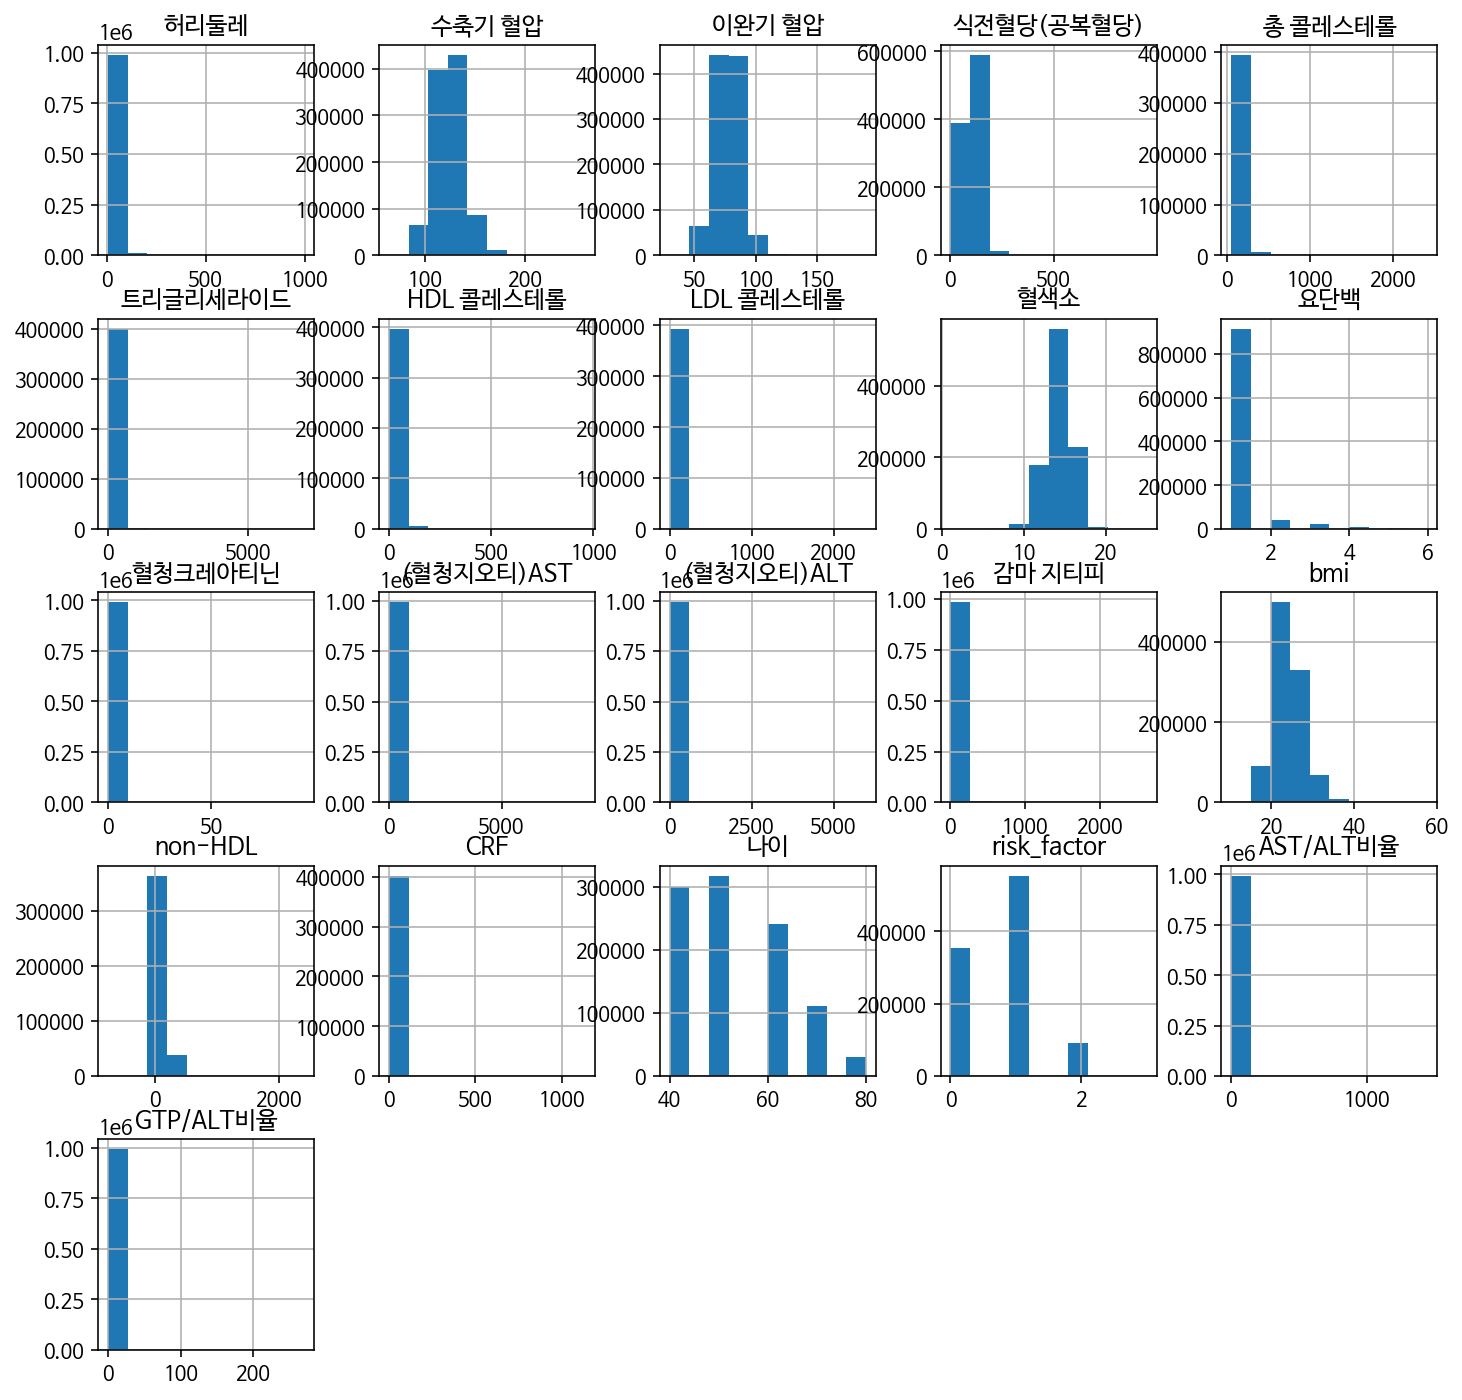

In [ ]:
# 전체 데이터에 대한 히스토그램을 출력합니다.

h = df.hist(figsize=(12, 12))

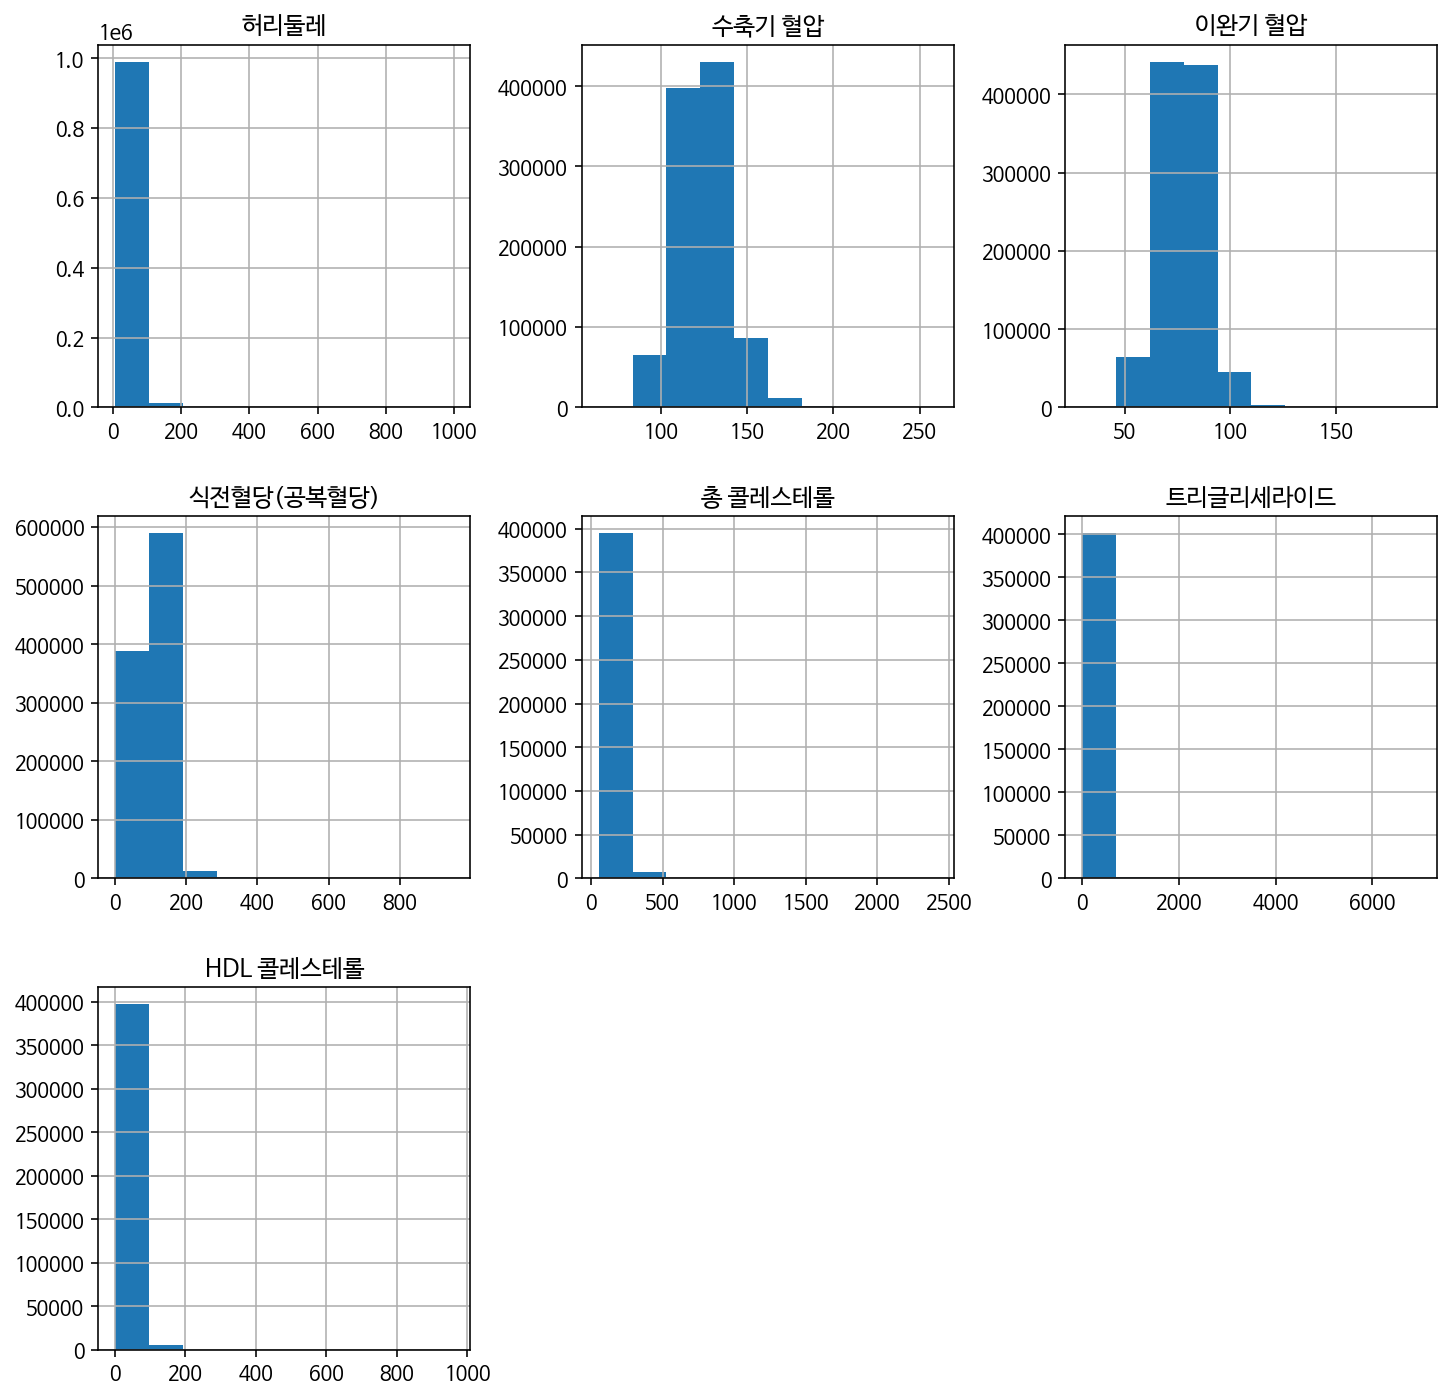

In [ ]:
# 슬라이싱을 사용해 앞에서 7개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
h = df.iloc[:, :7].hist(figsize=(12, 12))

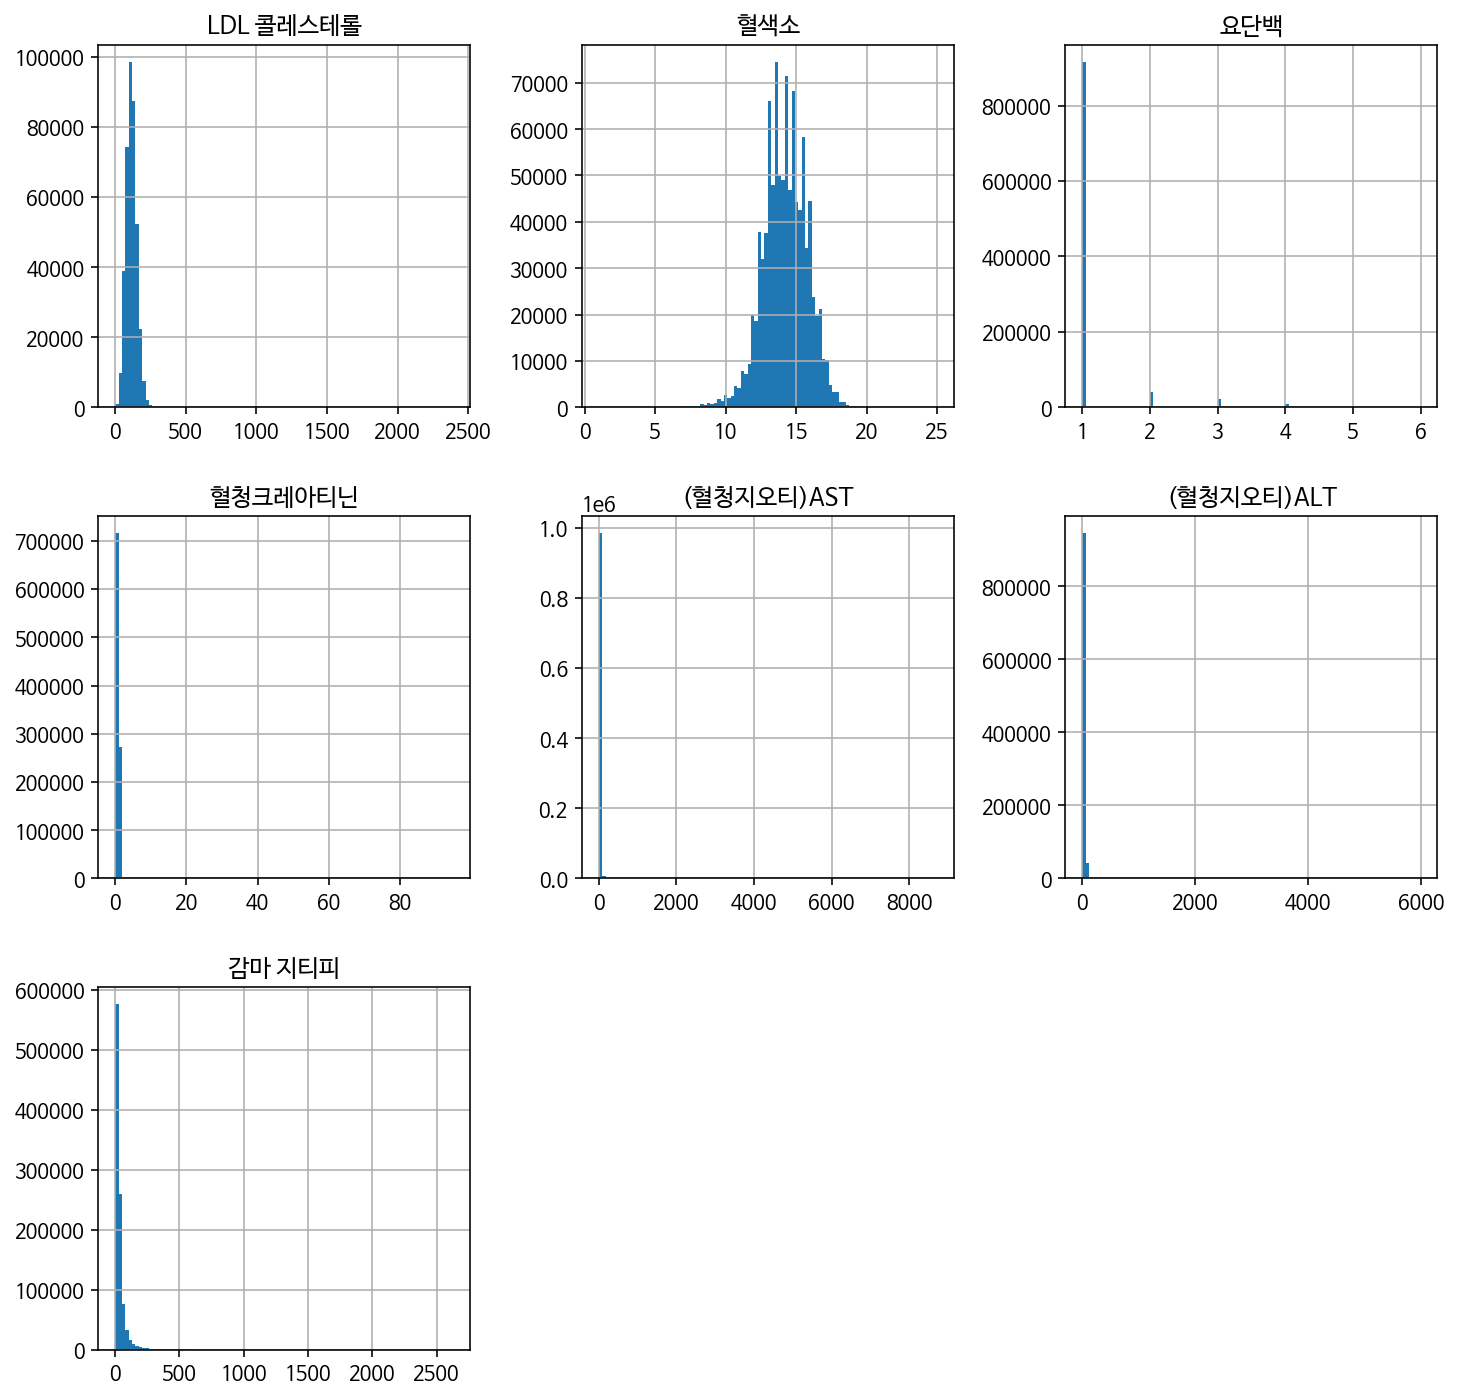

In [ ]:
# 슬라이싱을 사용해 앞에서 7번째부터 14번째까지(7:14) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 7:14].hist(figsize=(12, 12), bins=100)

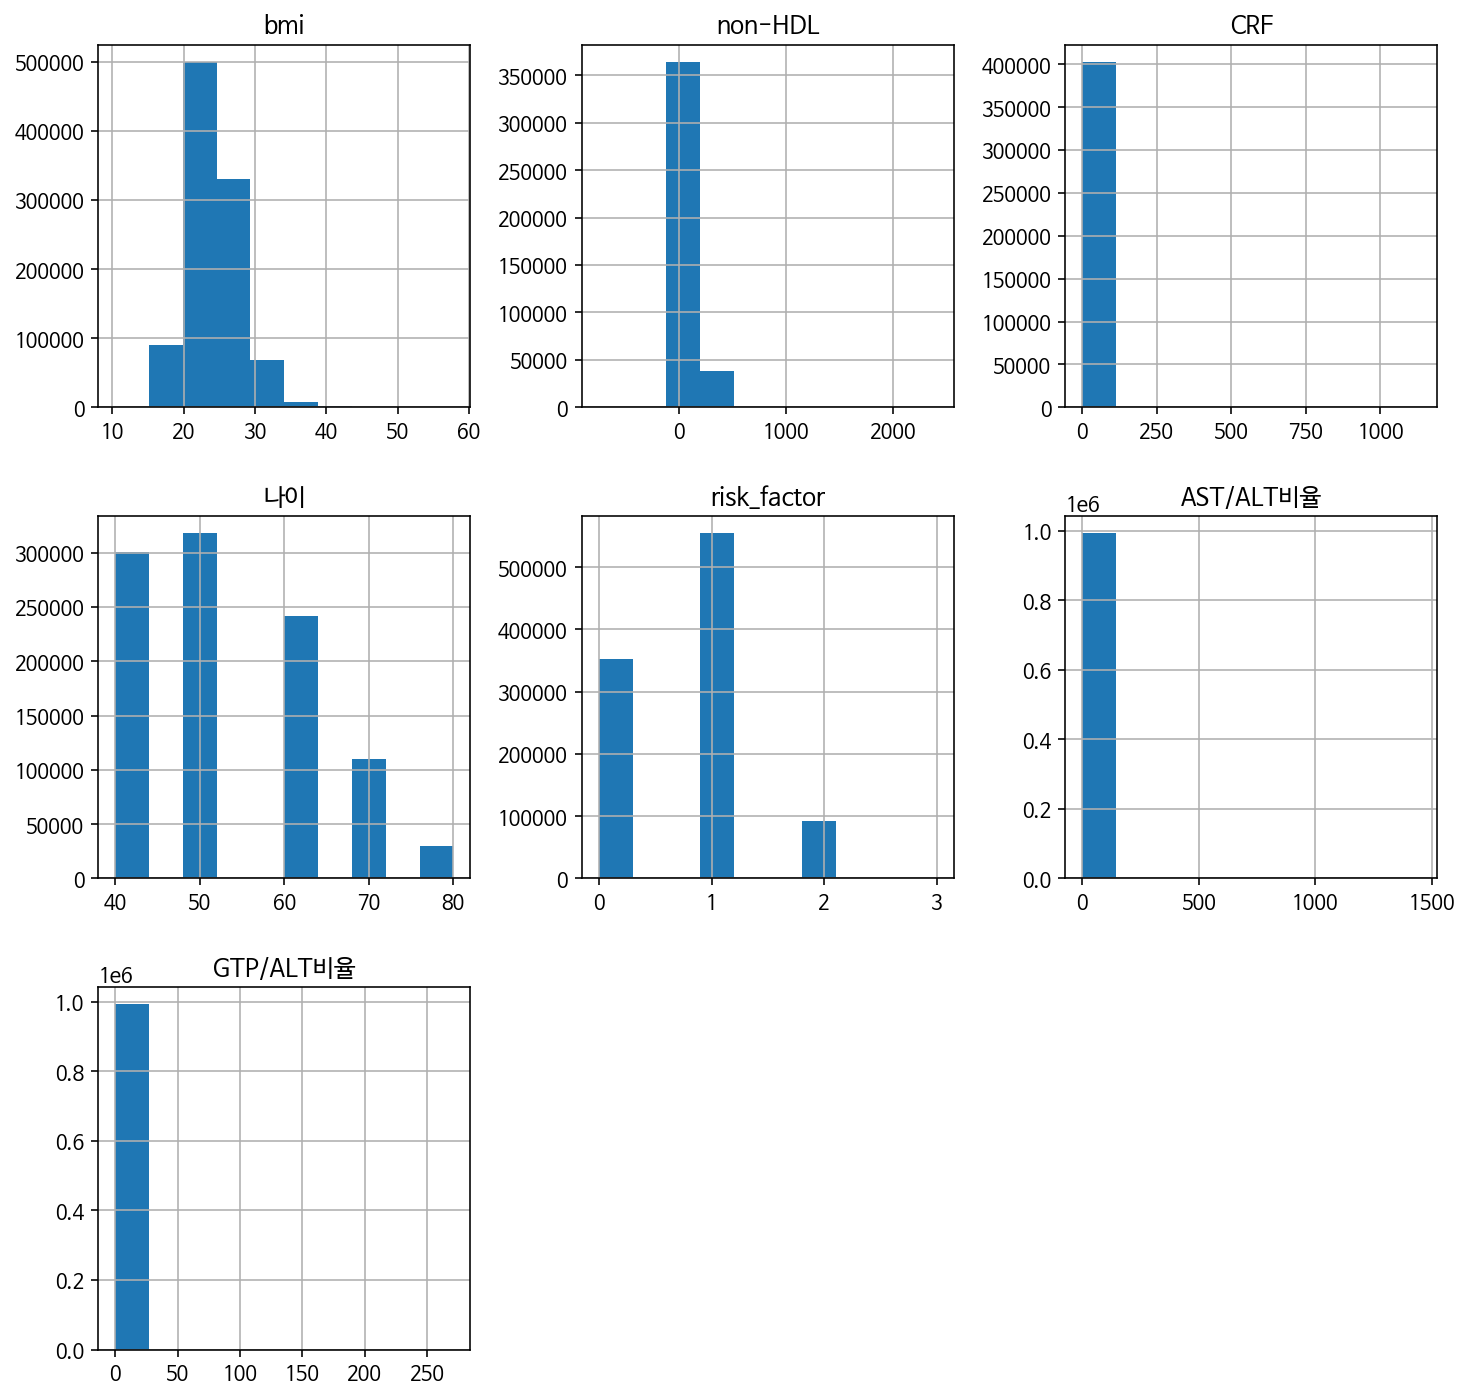

In [ ]:
# 슬라이싱을 사용해 앞에서 18번째부터 마지막까지(21:) 컬럼에 대한 데이터로 히스토그램을 그립니다.

h = df.iloc[:, 21:].hist(figsize=(12, 12), bins=10)

In [ ]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다. 
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다. 
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 51)

## 데이터 시각화 도구 Seaborn 사용하기
* https://seaborn.pydata.org/
* seaborn 은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

## 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
* value_counts 로 구한 값을 시각화 한다고 보면 됩니다.

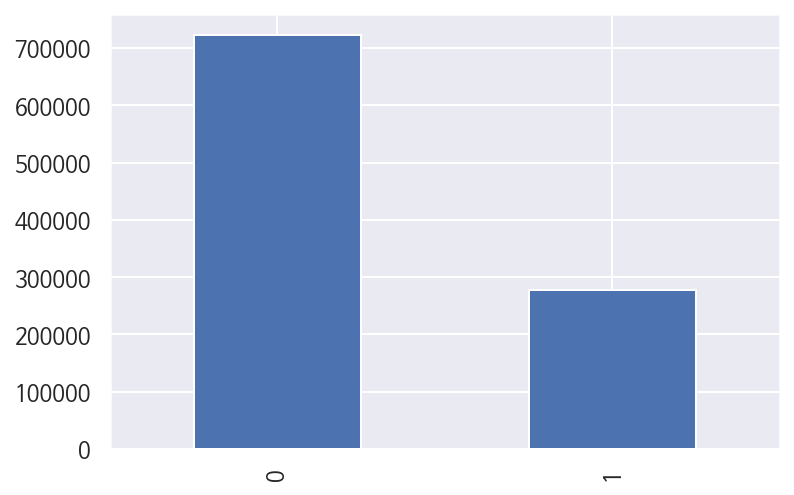

In [ ]:
# 복부비만에 따른 countplot을 그립니다.

df["복부비만"].value_counts().plot.bar()

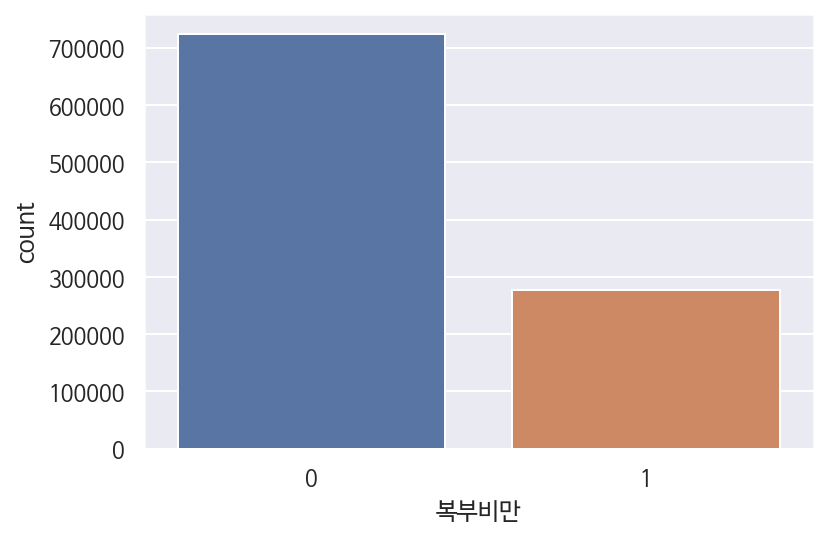

In [ ]:
sns.countplot(x="복부비만", data=df)

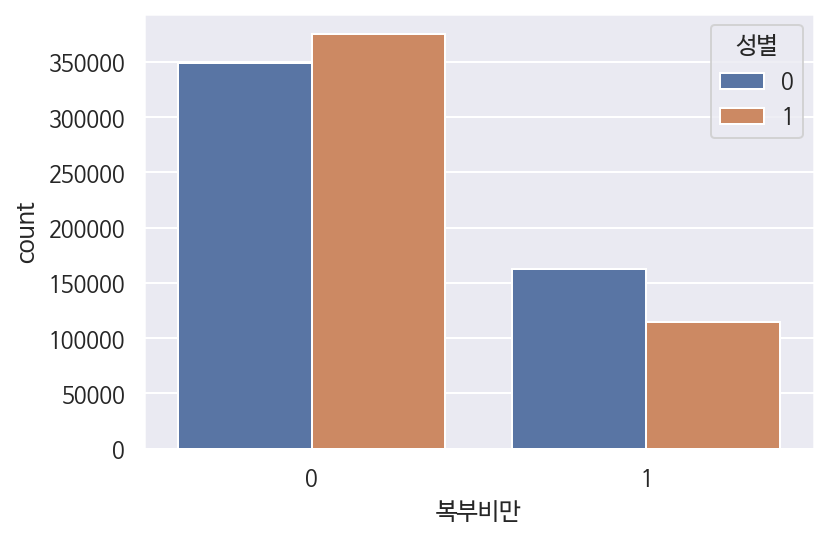

In [ ]:
# 복부비만에 따른 countplot을 그리고 hue 를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
sns.set(font_scale=1, font="NanumBarunGothic")
# Window
# sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(data=df, x="복부비만", hue="성별")

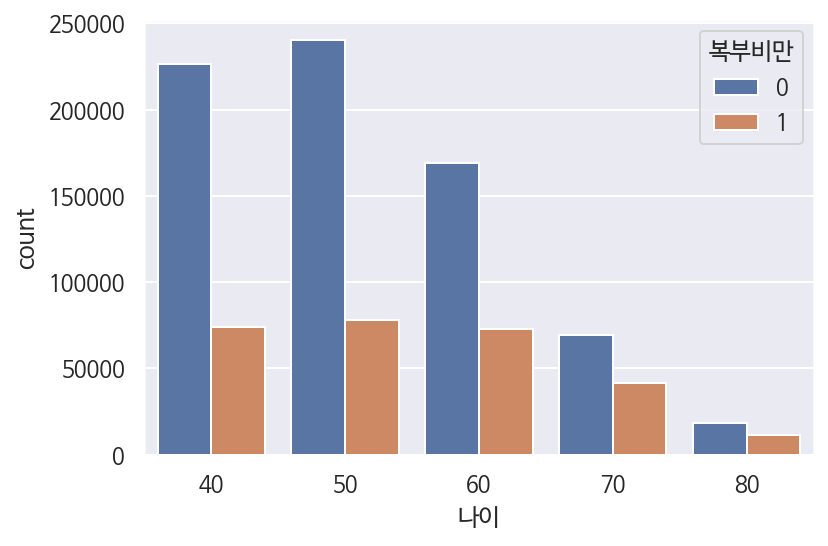

In [ ]:
# countplot으로 연령대별 복부비만를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x="나이", hue="복부비만")

#### countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

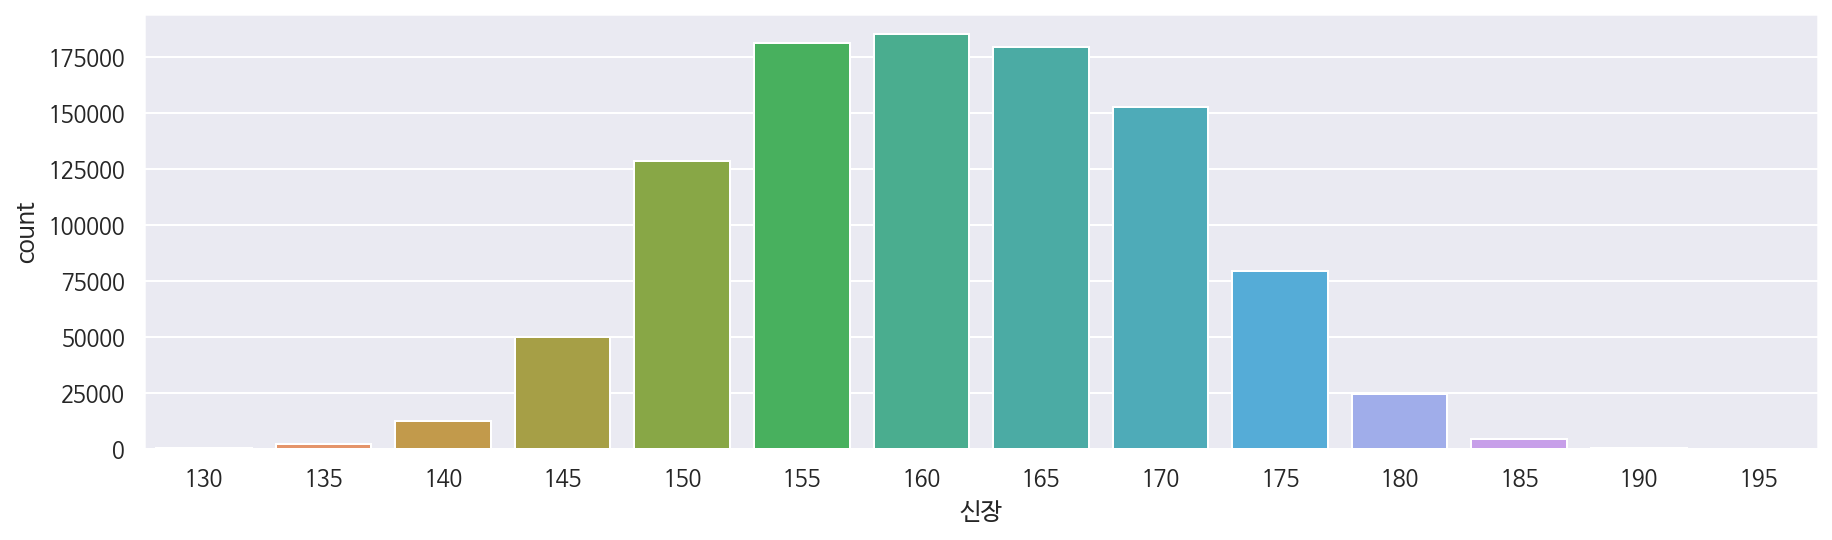

In [ ]:
# counplot으로 키를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장")

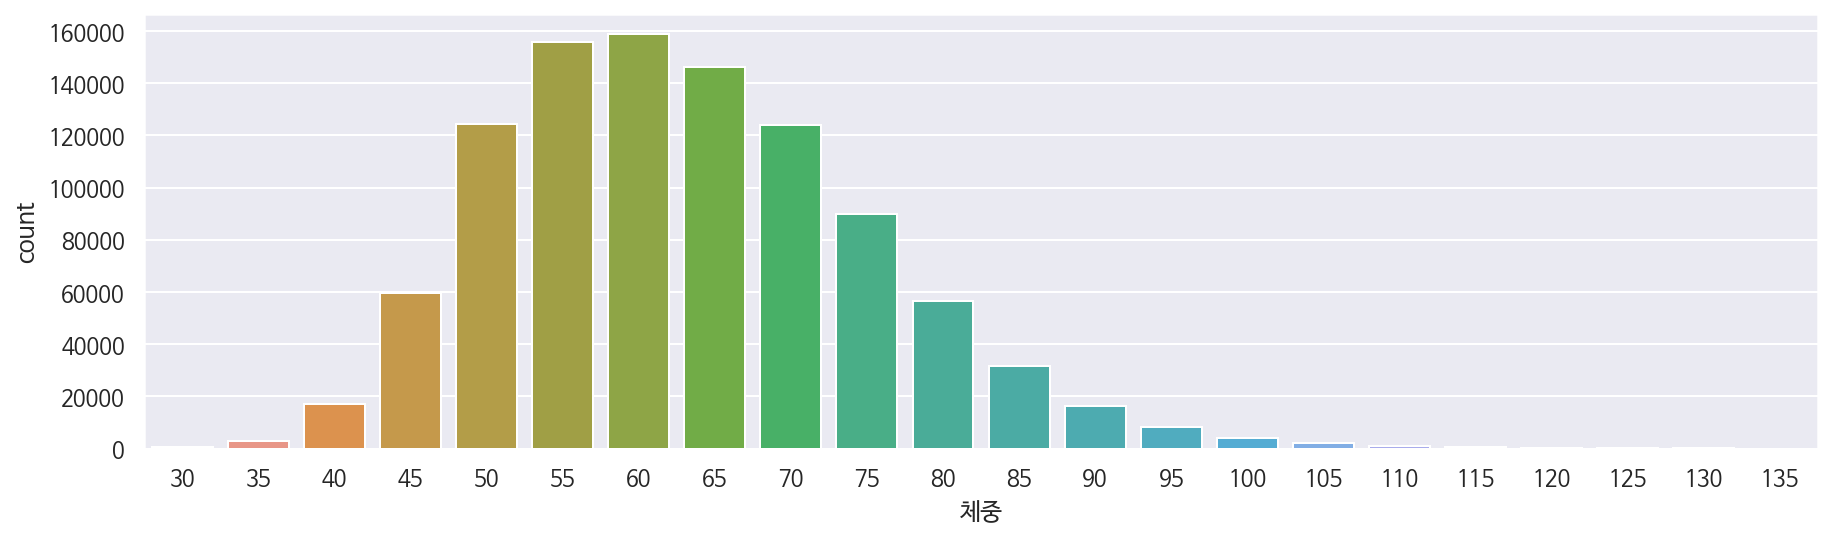

In [ ]:
# counplot으로 체중을 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중")

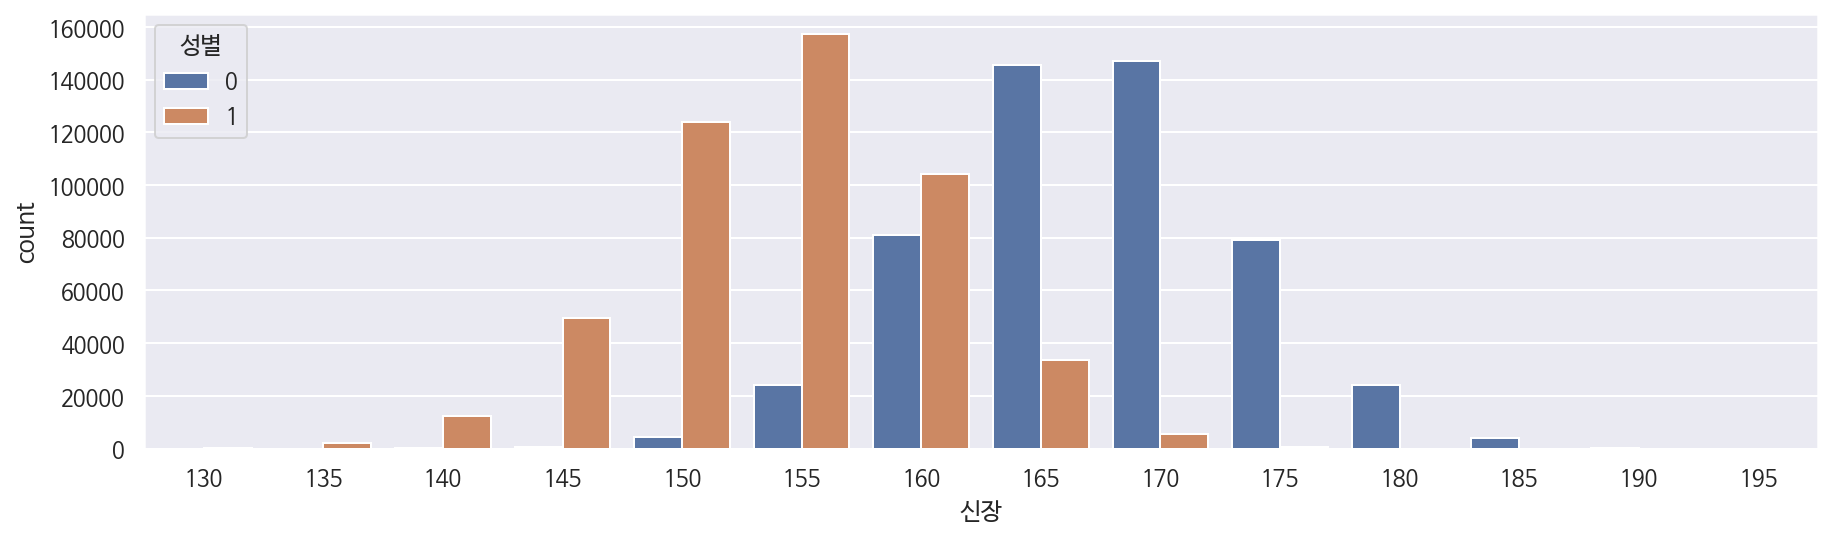

In [ ]:
# counplot으로 신장을 봅니다.
# 성별에 따른 키의 차이를 봅니다.

plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장", hue="성별")

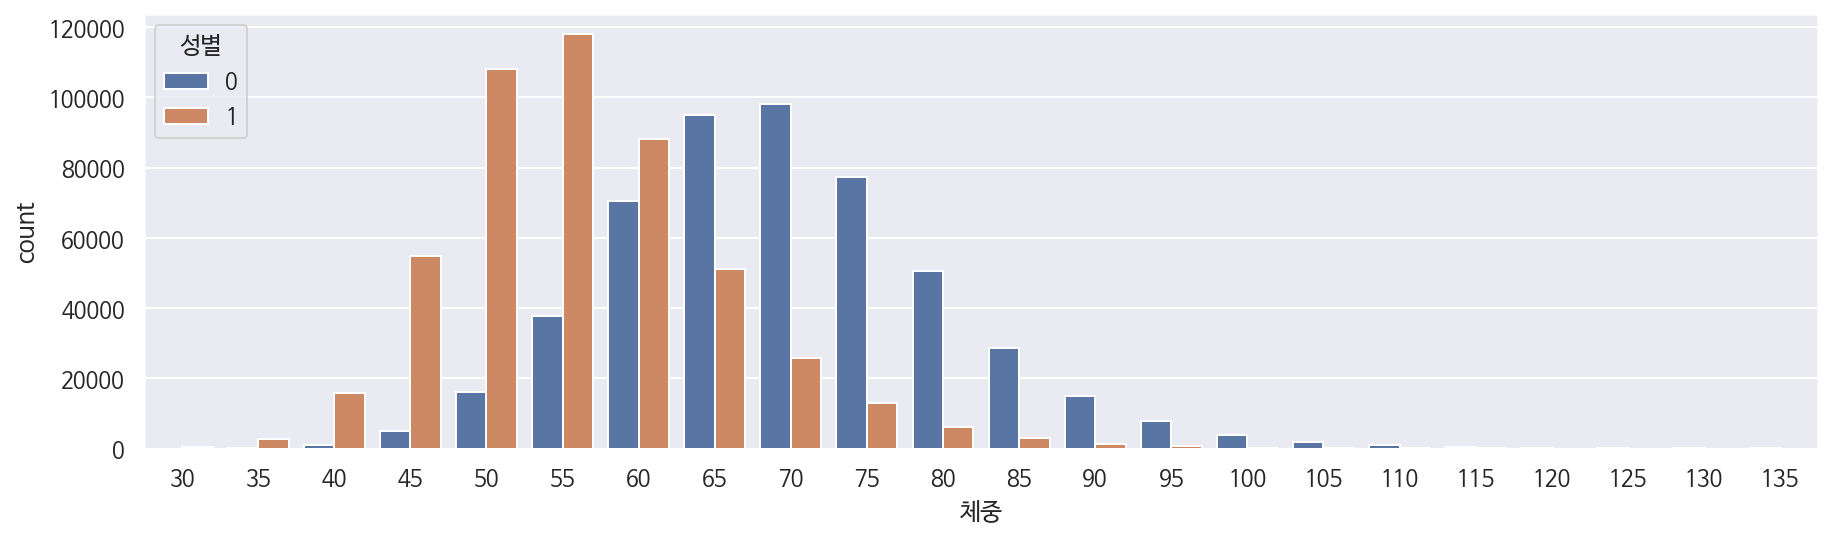

In [ ]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중", hue="성별")

### barplot - 수치형 vs 범주형 데이터 시각화

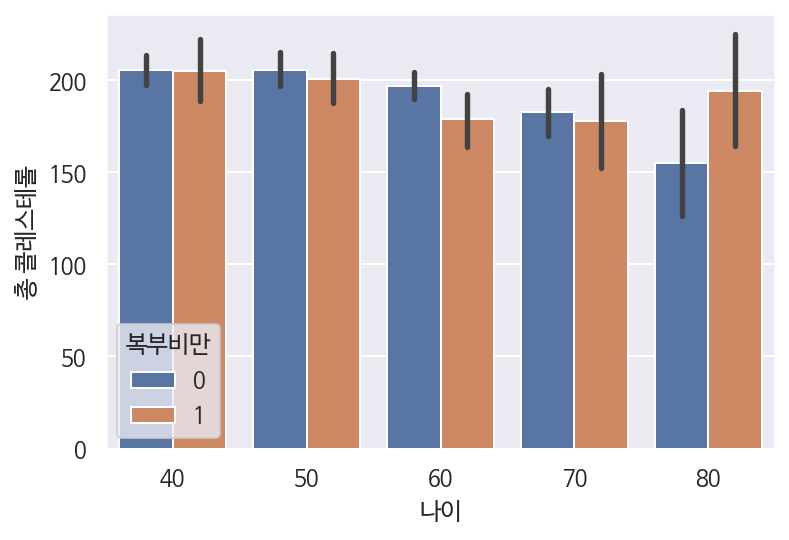

In [ ]:
# 나이와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 복부비만을 함께 봅니다.
sns.barplot(data=df_sample, x="나이", y="총 콜레스테롤", hue="복부비만")

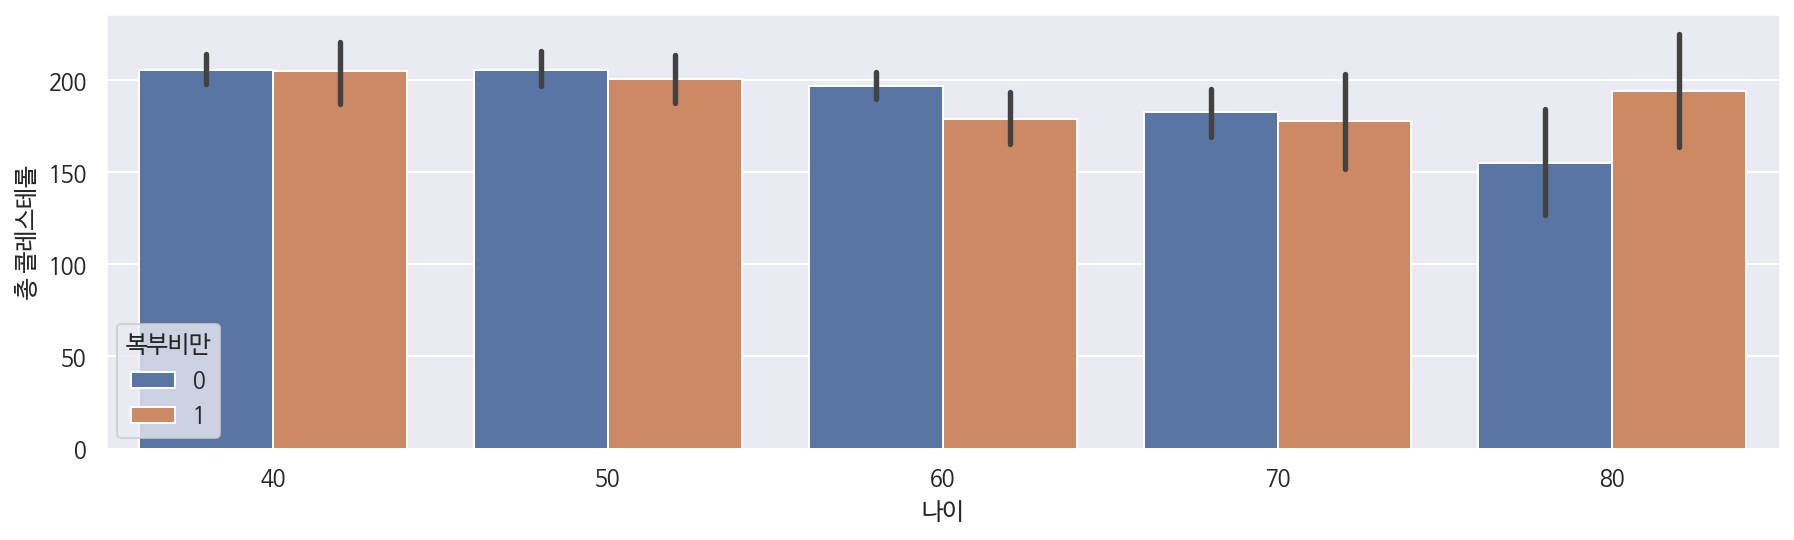

In [ ]:
# 나이와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 나이를 복부비만에 따라 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="나이", y="총 콜레스테롤", hue="복부비만")

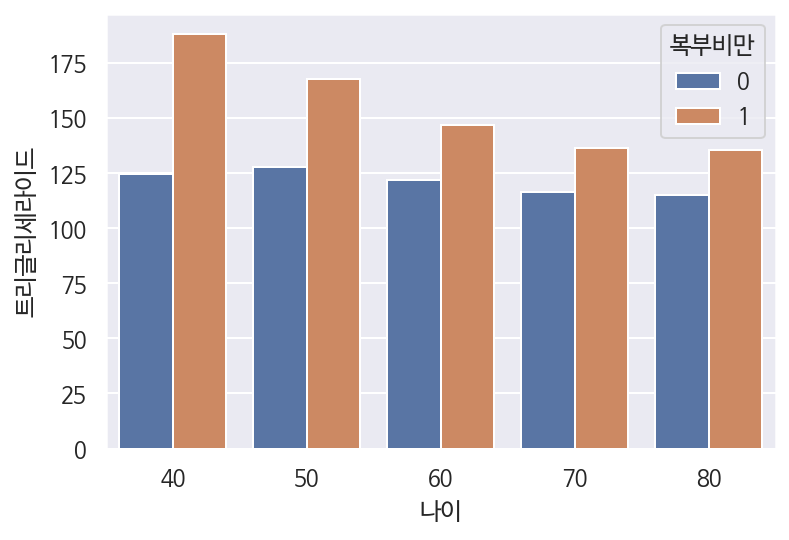

In [ ]:
# 트리글리세라이드(중성지방) 에 따른 나이를 복부비만에 따라 barplot으로 그립니다.
sns.barplot(data=df, x="나이", y="트리글리세라이드", hue="복부비만", ci=None)

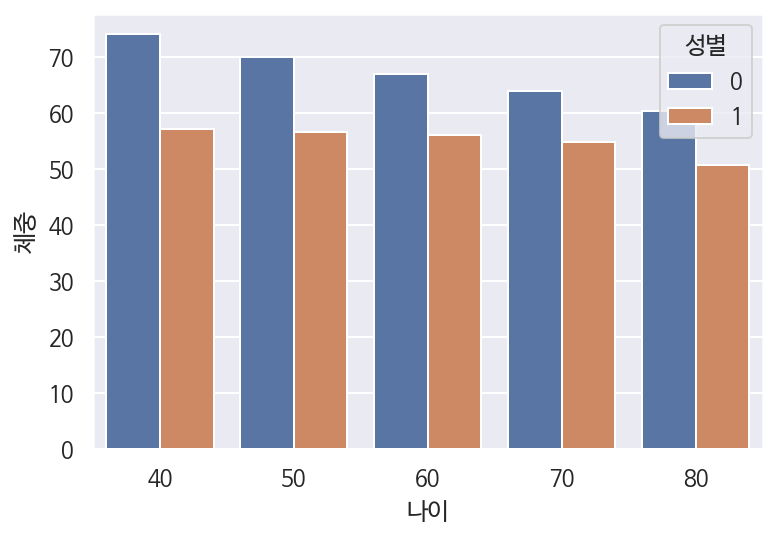

In [ ]:
# 나이와 체중을 성별에 따라 봅니다.

sns.barplot(data=df, x="나이", y="체중", hue="성별", ci=None)

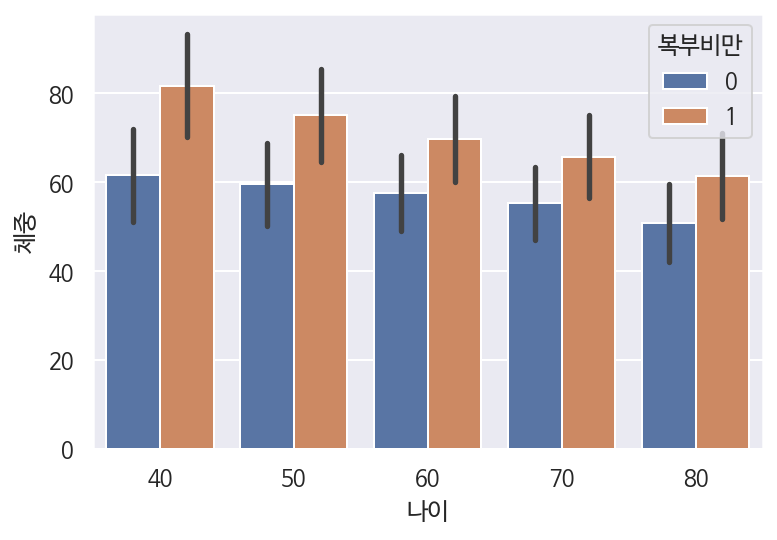

In [ ]:
# 나이에 따른 체중 복부비만에 따라 barplot으로 그립니다.

sns.barplot(data=df, x="나이", y="체중", hue="복부비만", ci="sd")

#### lineplot and pointplot

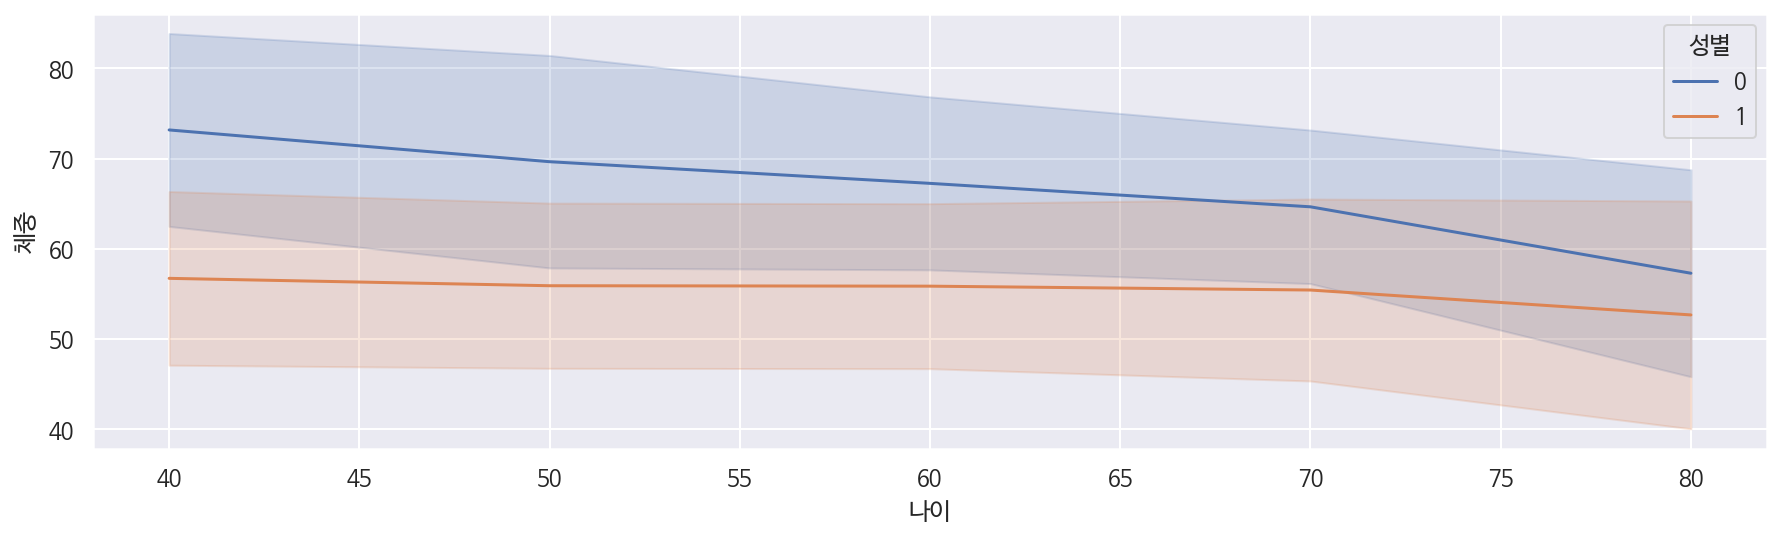

In [ ]:
# 나이에 따른 체중을 성별에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="나이", y="체중", hue="성별", ci="sd")

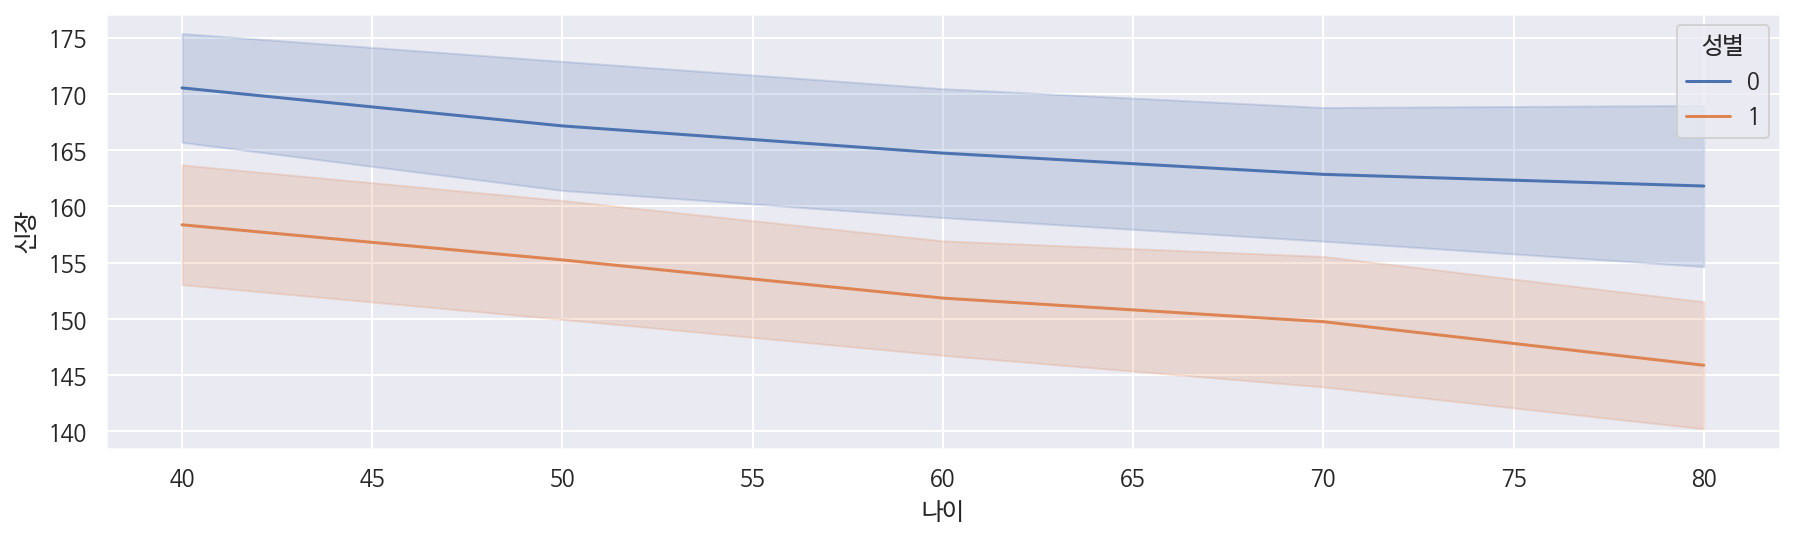

In [ ]:
# 나이에 따른 신을 성별에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="나이", y="신장", hue="성별", ci="sd")

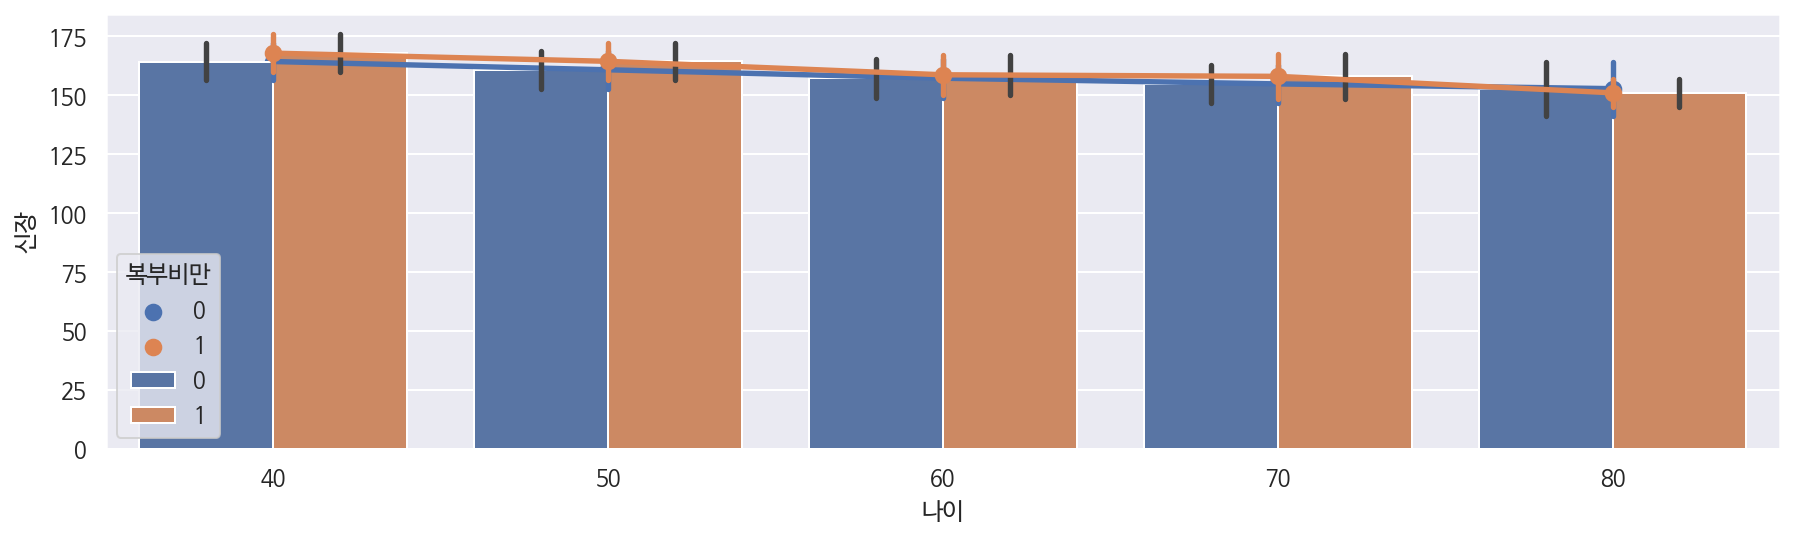

In [ ]:
# 나이에 따른 체중을 복부비만에 따라 pointplot과 barplot으로 그립니다.


plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="나이", y="신장", hue="복부비만", ci="sd")
sns.pointplot(data=df_sample, x="나이", y="신장", hue="복부비만", ci="sd")

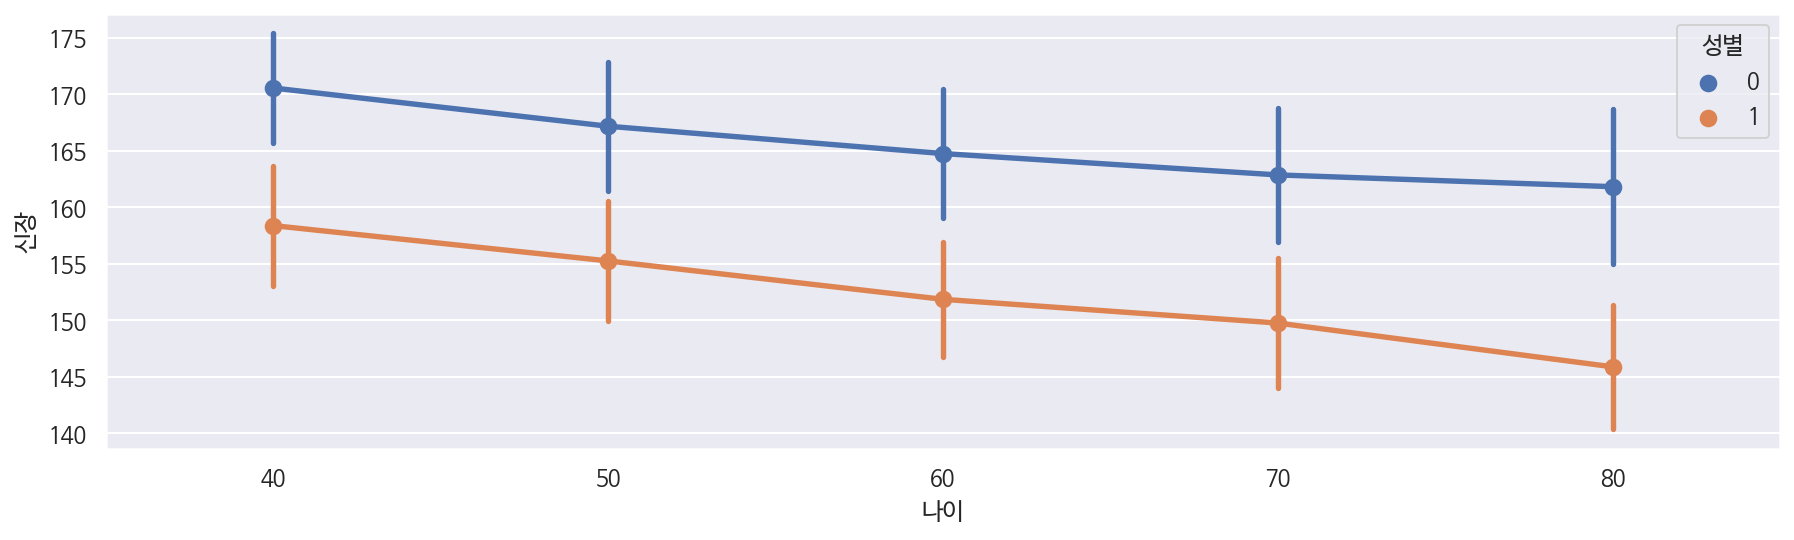

In [ ]:
# 나이에 따른 신장을 성별에 따라 pointplot으로 그립니다.

plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="나이", y="신장", hue="성별", ci="sd")

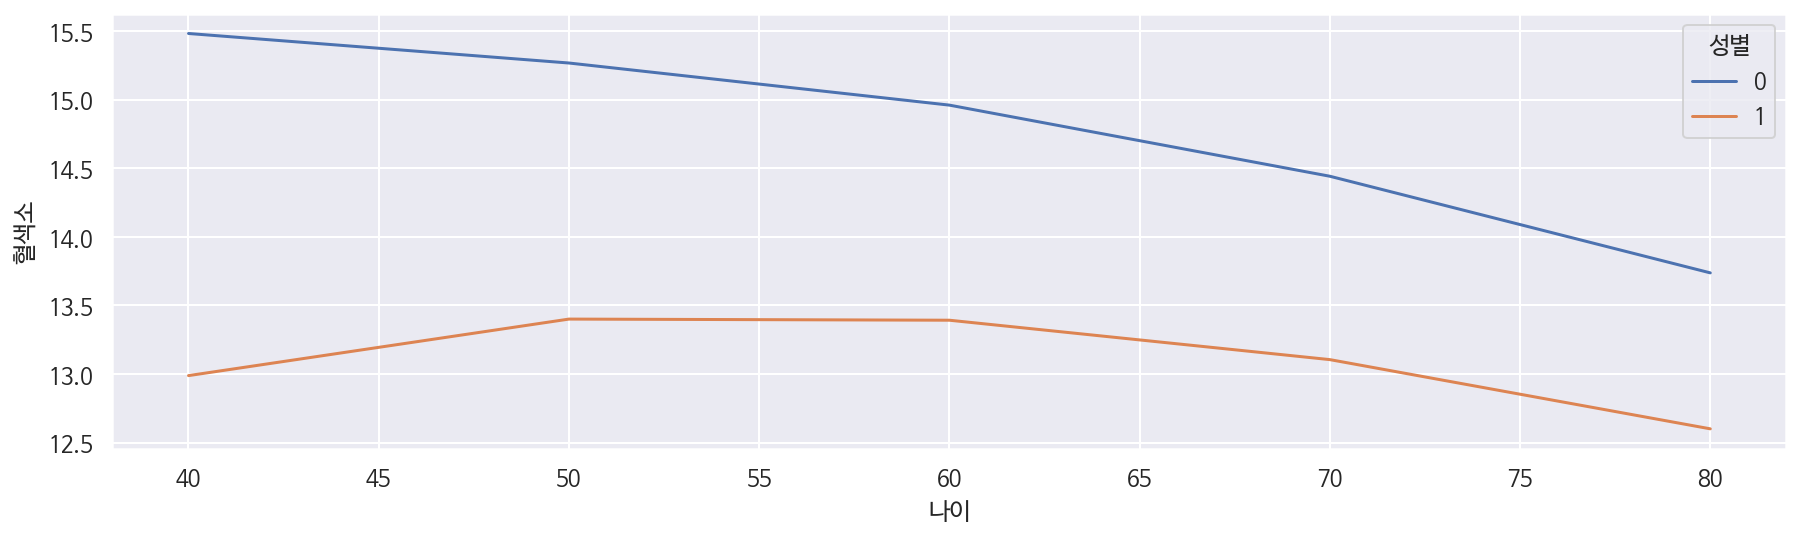

In [ ]:
# 나이에 따른 혈색소를 성별에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="나이", y="혈색소", hue="성별", ci=None)

### boxplot

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

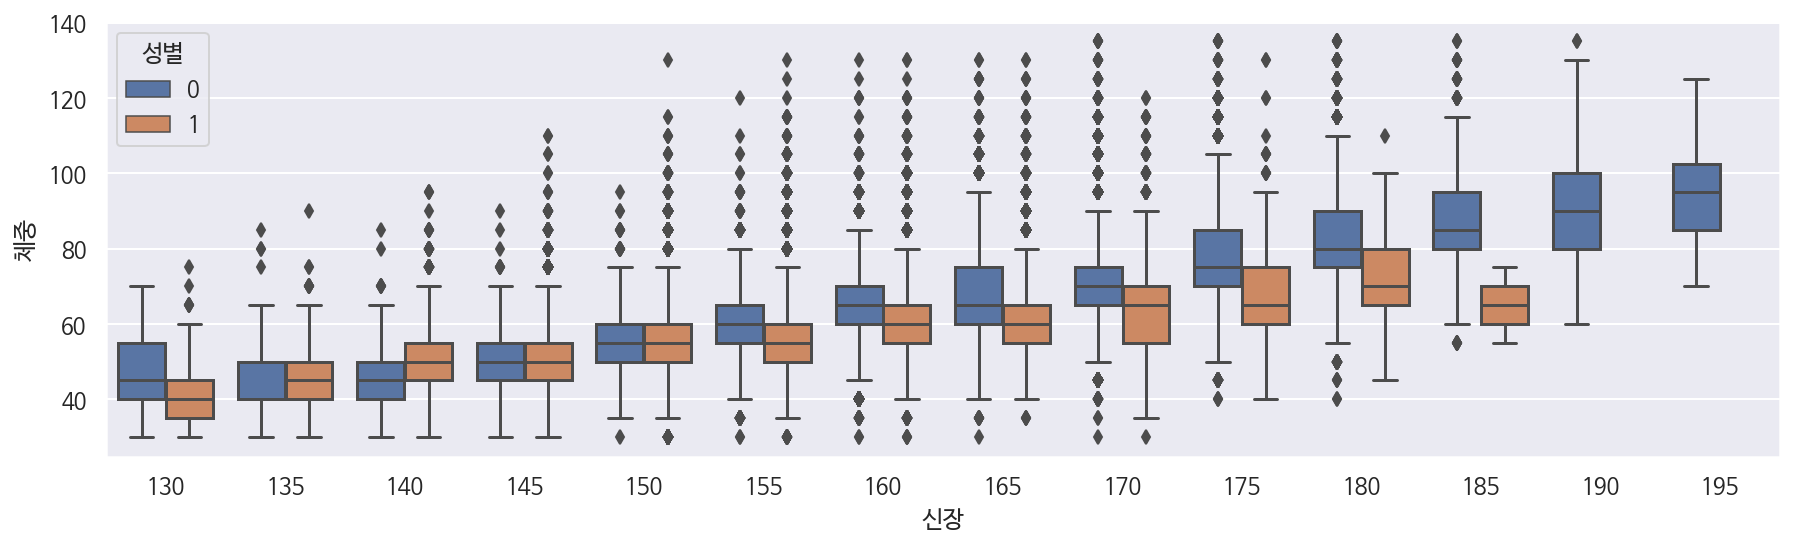

In [ ]:
# boxplot으로 신장에 따른 체중을 그리며, 성별에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장", y="체중", hue="성별")

### violinplot

In [ ]:
# # violinplot 신장에 따른 체중을 그리며, 복부비만에 따라 다른 색상으로 표현되게 합니다.
# plt.figure(figsize=(15, 4))
# sns.violinplot(data=df_sample, x="신장", y="체중", hue="음주여부")

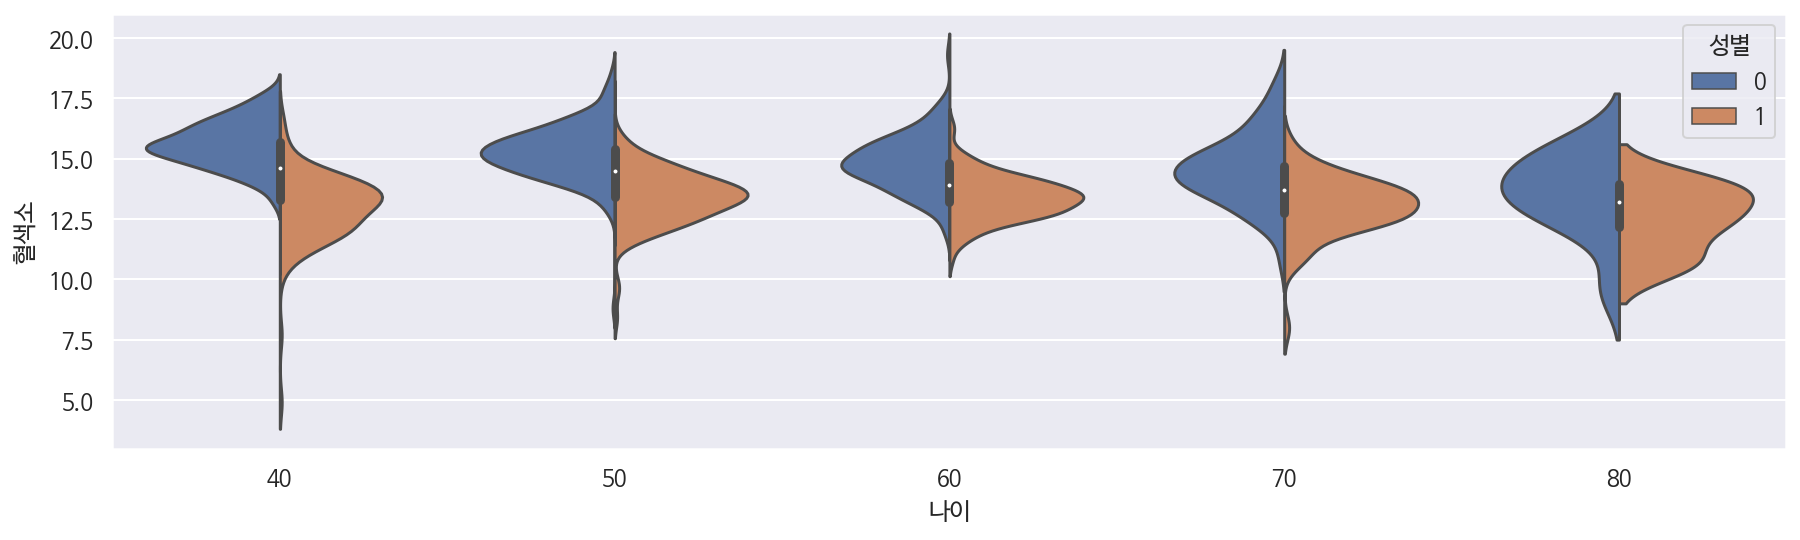

In [ ]:
# violinplot 나이에 따른 혈색소를 그리며, 성별에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="나이", y="혈색소", hue="성별", split=True)

### swarm plot
* 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; y

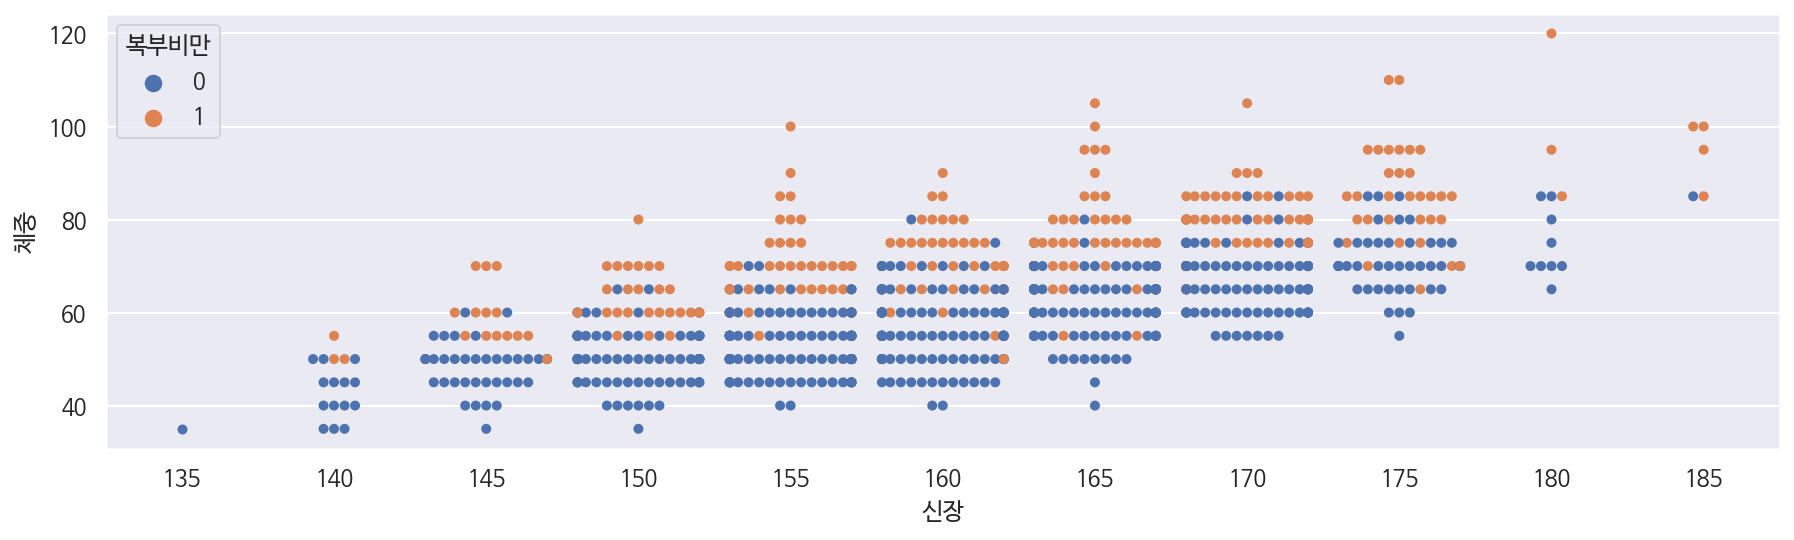

In [ ]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장", y="체중", hue="복부비만")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


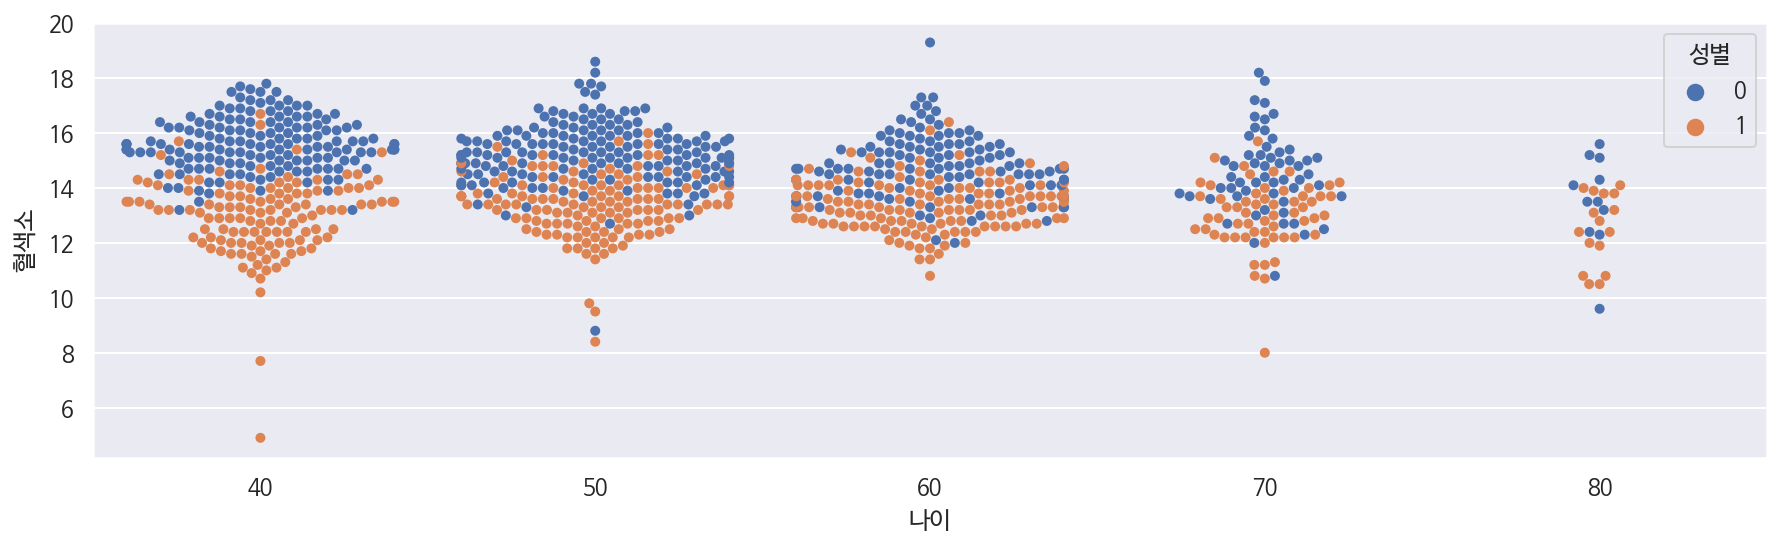

In [ ]:
# swarmplot으로 나이에 따른 복부비만 그리며, 성별에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="나이", y="혈색소", hue="성별")

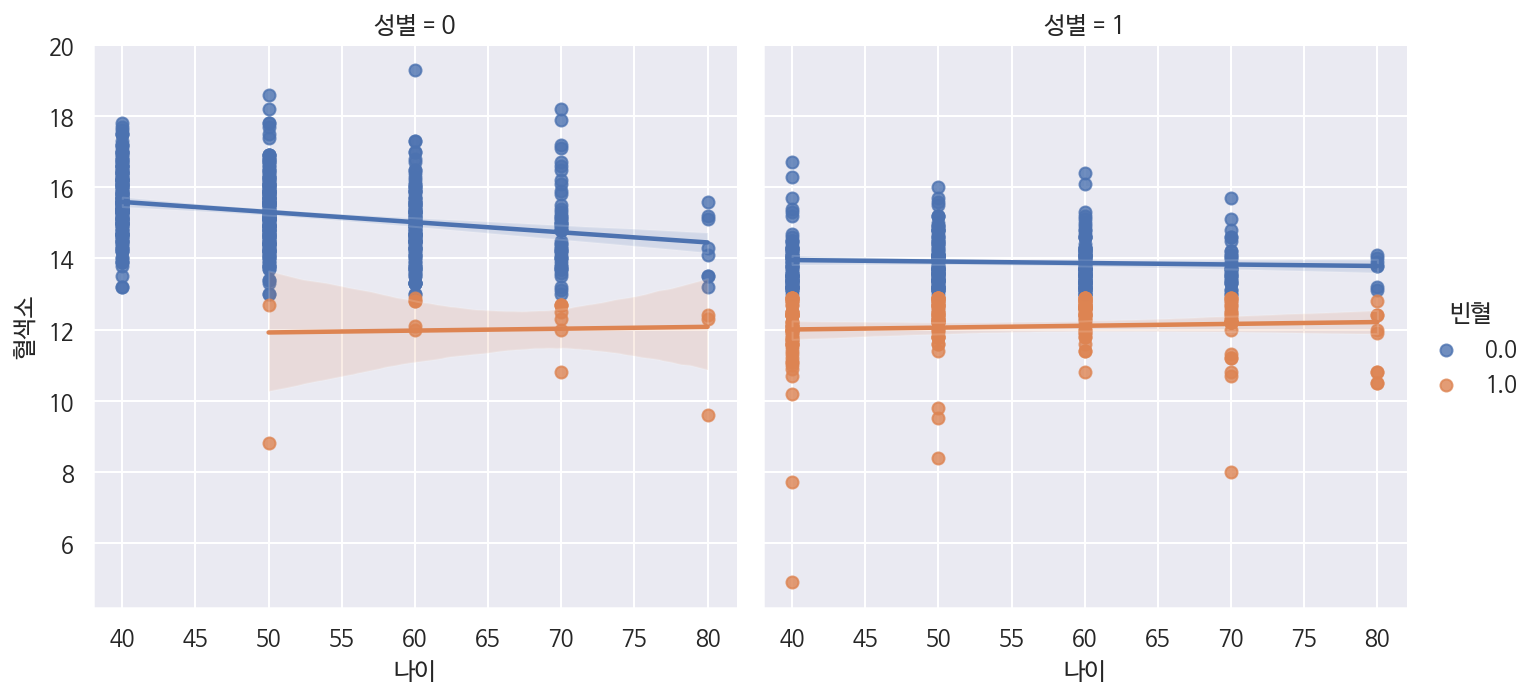

In [ ]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x="나이", y="혈색소", hue="빈혈", col="성별")

### 수치형 데이터 시각화

#### scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

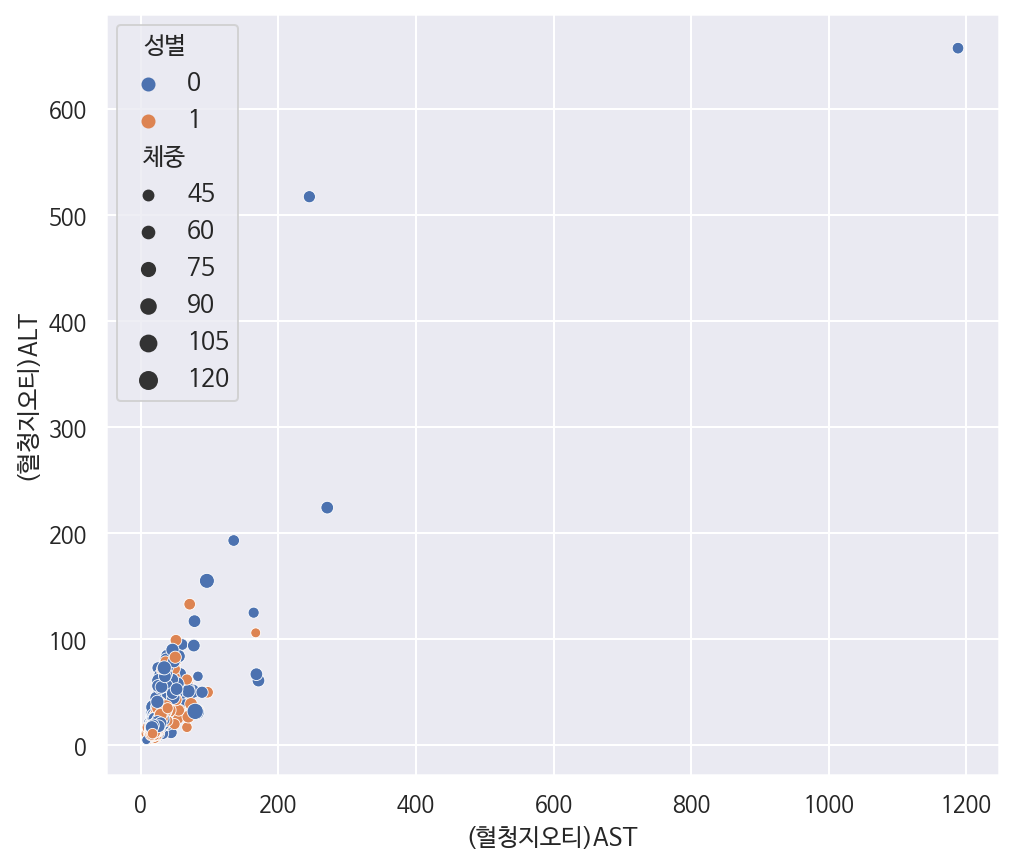

In [ ]:
# scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 성별에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="성별", 
                size="체중")

### lmplot - 상관 관계를 보기

In [ ]:
# lmplot 으로 신장에 따른 체중을 그리며, 복부비만에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data=df_sample, x="신장", y="체중", hue="음주여부", col="성별")

In [ ]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다. 

sns.lmplot(data=df_sample, x="신장", y="체중", hue="성별", col="음주여부")

In [ ]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="성별")

`AST와 ALT`
* 출처 : https://sev.iseverance.com/dept_clinic/center/liver/treatment/view.asp?con_no=87827


```
AST와 ALT는 간세포에 들어 있는 효소 입니다.

간이 손상돼 간세포가 파괴되면 그 안에 있던 AST와 ALT 가 빠져 나와 혈액 속에 섞여 돌아다니게 됩니다. 따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.

정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.

 

간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 하지만 AST 와 ALT 같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이 됩니다.
```

In [ ]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

### 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
* 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.

In [ ]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출해서 
# df_ASLT 라는 변수에 담습니다.
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

In [ ]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며 
# 음주여부에 따라 다른 색으로 표현합니다.

sns.lmplot(data=df_ASLT,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [ ]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서 
# df_ASLT_high 라는 변수에 담습니다.

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) |
                         (df["(혈청지오티)ALT"] > 400)]

In [ ]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.

sns.lmplot(data=df_ASLT_high,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [ ]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:21]

### distplot
* [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)
* [확률 밀도 함수 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%99%95%EB%A5%A0_%EB%B0%80%EB%8F%84_%ED%95%A8%EC%88%98)

In [ ]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.

df.columns

In [ ]:
df_chol = df.loc[df["총 콜레스테롤"].notnull(), "총 콜레스테롤"]
df_chol.head()

In [ ]:
df_chol.describe()

In [ ]:
# "총콜레스테롤" 에 따른 distplot 을 그립니다.
sns.distplot(df_chol)

In [ ]:
# 음주여부가 1인 값에 대한 "총콜레스테롤" 을 distplot 으로 그립니다.
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
    "총콜레스테롤"])

In [ ]:
# 음주여부가 0인 값에 대한 "총콜레스테롤" 을 distplot 으로 그립니다.

sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
    "총콜레스테롤"])

In [ ]:
# 음주여부 값에 대한 "총콜레스테롤" 을 distplot 으로 그리며, 하나의 그래프에 표시되도록 합니다.

plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
    "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
    "총콜레스테롤"], label="음주 안 함")

In [ ]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.
s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [ ]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

### 상관계수 구하기

In [ ]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터프레임에 담은 뒤 상관계수를 구합니다.

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

In [ ]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

In [ ]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr.loc[df_corr["음주여부"] > 0.25,"음주여부"]

In [ ]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr["혈색소"].sort_values(ascending=False).head(7)

In [ ]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr["감마지티피"].sort_values(ascending=False).head(7)

### heatmap
* [Plotting a diagonal correlation matrix — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [ ]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)